<a href="https://colab.research.google.com/github/cyclonecizek/LightningProbabilityTool/blob/main/New_Lightning_Probability_Tool.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Preamble

Preamble


In [1]:
!pip install -U altair

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 996.9/996.9 kB 5.0 MB/s eta 0:00:00
  Attempting uninstall: altair
    Found existing installation: altair 4.2.2
    Uninstalling altair-4.2.2:
      Successfully uninstalled altair-4.2.2


In [2]:
# -*- coding: utf-8 -*-


import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

pd.set_option('display.max_rows', 40)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

import scipy.stats as stats
import seaborn as sns
import statsmodels.api as sm
import statsmodels.formula.api as smf

from sklearn.model_selection import train_test_split
from patsy import dmatrices

from sklearn import tree # for decision tree models

import plotly.express as px  # for data visualization
import plotly.graph_objects as go # for data visualization
import graphviz # for plotting decision tree graphs

from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

print("\n---Libraries loaded")



---Libraries loaded


In [2]:
import altair as alt

# Data Understanding/Preparation

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Data preparation

In [4]:
soundingfile = '/content/drive/My Drive/soundingdata_2008_2022_final.csv'
plfile = '/content/drive/My Drive/precipltng_2008_2022.csv'

In [5]:
df1 = pd.read_csv(soundingfile)
df2 = pd.read_csv(plfile)


print(df1.head(10))
print(df2.head(10))

  Platform    Lat    Lon  Elevation (m)    Year  Month   Day  Hour (UTC)  Minute    DST  Sounding Base  Sounting Top  Sounding Levels       CAPE  700-500mb Lapse Rate  850-500mb Lapse Rate         LI    KI  Thompson Index  Total Totals  T 1000mb  T 850mb  T 700mb  T 500mb  Convective Temperature  1000-700mb RH       PWAT  700-500mb Average RH  Surface-700mb Average RH  Surface-700mb Average Wind Speed  1000-700mb Average U-Wind Component  1000-700mb Average V-Wind Component  850mb Average U-Wind Component  850mb Average V-Wind Component  700mb Average U-Wind Component  700mb Average V-Wind Component  500mb Average U-Wind Component  500mb Average V-Wind Component  250mb Average U-Wind Component  250mb Average V-Wind Component  0-6km Shear  0-3km Storm Relative Helicity  Wet Bulb Zero Level  Equilibrium Level  Lowest Freezing Level   -10C Level  Cloud Depth Ratio  Energy Helicity Index Bulk Richardson Number     date  Precip?  Lightning?
0     KXMR  28.47 -80.55            5.0  2008.0   

In [6]:
# prompt: Merge df1 and df2 when df1['date'] = df2['Date']. Keep all the rows in df1, but only the ones that match from df2

import pandas as pd
df = pd.merge(df1, df2, how='left', left_on='date', right_on='Date')
df


Platform        Lat    Lon  Elevation (m)    Year  Month   Day  Hour (UTC)  Minute    DST  Sounding Base  Sounting Top  Sounding Levels       CAPE  700-500mb Lapse Rate  850-500mb Lapse Rate         LI    KI  Thompson Index  Total Totals  T 1000mb  T 850mb  T 700mb  T 500mb  Convective Temperature  1000-700mb RH       PWAT  700-500mb Average RH  Surface-700mb Average RH  Surface-700mb Average Wind Speed  1000-700mb Average U-Wind Component  1000-700mb Average V-Wind Component  850mb Average U-Wind Component  850mb Average V-Wind Component  700mb Average U-Wind Component  700mb Average V-Wind Component  500mb Average U-Wind Component  500mb Average V-Wind Component  250mb Average U-Wind Component  250mb Average V-Wind Component  0-6km Shear  0-3km Storm Relative Helicity  Wet Bulb Zero Level  Equilibrium Level  Lowest Freezing Level   -10C Level  Cloud Depth Ratio  Energy Helicity Index Bulk Richardson Number      date  Precip?  Lightning?      Date  Precip  Lightning
0        KXMR  28.470000 -80.55            5.0  2008.0    1.0   1.0        12.0     0.0  False           16.4      100623.4            112.0 -11.533660             -0.001787             -0.001657  -0.306529  26.1       26.406529          46.4      21.8     13.0      5.4    -10.3               18.548023      87.109241  39.288397             24.772419                 87.586711                         16.997943                            16.580282                             4.094258                           14.81                            8.55                           24.24                           14.00                           28.66                           20.07                           68.68                           25.00     0.005655                     -62.456558         10701.618900       24609.219000           14948.383950  19077.26439           0.556197               0.004502           -3964.417821    1/1/08      1.0         NaN    1/1/08     1.0        0.0
1        KXMR  28.470000 -80.55            5.0  2008.0    1.0   2.0        12.0     0.0  False           16.4      100721.8            118.0   0.000000             -0.002330             -0.001112  25.951731 -46.9      -72.851731           1.0       4.2      1.6      6.4    -13.9              -13.684513      14.966416   4.588119              6.983682                 17.525521                         32.763007                            28.414938                           -13.774158                           17.72                          -14.87                           48.44                          -12.98                           60.80                            5.32                           88.97                           41.49     0.008333                     -68.352304           890.614733                NaN            2493.438400  17289.48201                NaN               0.000000                      0    1/2/08      0.0         NaN    1/2/08     0.0        0.0
2        KXMR  28.470000 -80.55            5.0  2008.0    1.0   3.0        12.0     0.0  False           16.4      100754.6            126.0   0.000000             -0.002175             -0.000739  25.719910 -28.0      -53.719910          20.1       4.6     -4.9      3.8    -15.1               -0.831654      52.030947   8.755767              4.414098                       NaN                               NaN                             4.724349                           -37.583847                          -13.97                          -29.95                           35.68                          -50.95                           43.47                          -30.44                           94.89                            8.30          NaN                    -250.570919          2840.356684                NaN            3341.794554  16892.89057                NaN               0.000000                    NaN    1/3/08      1.0         NaN    1/3/08     1.0        0.0
3        KXMR  28.470000 -80.55            5.0  2008.0   

In [7]:

columns = ['Platform', 'Lat', 'Lon', 'Elevation (m)', 'Minute', 'DST', 'Sounding Base', 'Sounting Top', 'Sounding Levels', 'Bulk Richardson Number', 'Precip?', 'Lightning?', 'date']
df.drop(columns, inplace=True, axis=1)

df.head(10)
print("HAIL SEASON")
df=df[(df['Month'] > 5) & (df['Month'] < 10)]
df=df[(df['PWAT'] <80) & (df['PWAT'] > 0)]
df.head(150)

HAIL SEASON


Year  Month   Day  Hour (UTC)         CAPE  700-500mb Lapse Rate  850-500mb Lapse Rate        LI    KI  Thompson Index  Total Totals  T 1000mb  T 850mb  T 700mb  T 500mb  Convective Temperature  1000-700mb RH       PWAT  700-500mb Average RH  Surface-700mb Average RH  Surface-700mb Average Wind Speed  1000-700mb Average U-Wind Component  1000-700mb Average V-Wind Component  850mb Average U-Wind Component  850mb Average V-Wind Component  700mb Average U-Wind Component  700mb Average V-Wind Component  500mb Average U-Wind Component  500mb Average V-Wind Component  250mb Average U-Wind Component  250mb Average V-Wind Component  0-6km Shear  0-3km Storm Relative Helicity  Wet Bulb Zero Level  Equilibrium Level  Lowest Freezing Level   -10C Level  Cloud Depth Ratio  Energy Helicity Index     Date  Precip  Lightning
145  2008.0    6.0   1.0        10.0   100.122671             -0.001680             -0.001711  1.334996  19.3       17.965004          38.6      24.4     17.0      7.6     -7.3               18.602096      51.973272  30.177579             16.826323                 53.585805                          8.290325                            -0.961274                            -2.227660                           -3.12                          -11.64                            1.55                           -8.81                            5.73                           -4.01                           24.98                           -2.19     0.000844                      32.212329          10794.78363                NaN            15759.67369  20678.23162                NaN               0.020157   6/1/08     0.0        0.0
146  2008.0    6.0   2.0        10.0  1110.840991             -0.001627             -0.001790 -3.457656  37.8       41.257656          47.9      25.2     16.6      5.6     -8.7               20.506118      79.754344  45.559895             53.370606                 79.977221                          9.637275                             7.491930                             0.891358                            5.82                            1.56                            4.75                           -1.73                           17.80                           -3.14                          -10.44                           -6.03     0.002473                      34.827033          12850.83752                NaN            12989.60268  19857.17758                NaN               0.241796   6/2/08     1.0        1.0
147  2008.0    6.0   3.0        10.0    80.277292             -0.001675             -0.001863  0.500132  29.1       28.599868          44.6      22.8     17.8      6.2     -8.5               17.921577      74.723238  43.532766             67.907790                 75.451792                          4.083091                             3.077040                             0.385988                            0.49                            0.84                            2.90                           -0.25                            0.00                          -17.11                            5.23                          -29.67     0.002574                      14.811654          13018.27003        17553.86260            13122.26639  19890.32685           0.635312               0.007431   6/3/08     0.0        0.0
148  2008.0    6.0   4.0        10.0   768.183065             -0.001591             -0.001681 -1.931592  28.5       30.431592          40.8      25.2     17.6      7.8     -6.3               21.131808      68.051229  39.731786             30.783248                 68.749466                          7.825780                             0.483695                             5.889320                           -2.04                            3.54                           -2.23                           -1.87                           -5.54                           -9.60                           15.66                           -9.04     0.000928                      11.537245         

In [8]:
# prompt: make all the column names in df have no spaces within their string

df.columns = [column.replace(' ', '_') for column in df.columns]


Data Description Table

In [9]:
df.info()
df.describe()
df.isnull().sum()
df['PWAT'].describe()

#df_warm.info()
#df_warm.describe()
#df_warm.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1609 entries, 145 to 5178
Data columns (total 42 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Year                                 1609 non-null   float64
 1   Month                                1609 non-null   float64
 2   Day                                  1609 non-null   float64
 3   Hour_(UTC)                           1609 non-null   float64
 4   CAPE                                 1595 non-null   float64
 5   700-500mb_Lapse_Rate                 1608 non-null   float64
 6   850-500mb_Lapse_Rate                 1608 non-null   float64
 7   LI                                   1597 non-null   float64
 8   KI                                   1608 non-null   float64
 9   Thompson_Index                       1597 non-null   float64
 10  Total_Totals                         1608 non-null   float64
 11  T_1000mb                    

count    1609.000000
mean       46.319351
std         8.502453
min         0.957534
25%        41.642368
50%        47.364228
75%        51.678487
max        77.486312
Name: PWAT, dtype: float64

In [10]:
rows, columns = df.shape
cell_count = rows * columns
number_of_nulls = df.isnull().sum().sum()
percentage_of_missing = (number_of_nulls / cell_count) * 100
print(f'Percentage of missing values: {percentage_of_missing}%')

Percentage of missing values: 2.8707567551570037%


# Data Preparation

Dealing with Null values

In [11]:
df['Cloud_Depth_Ratio'].fillna(0, inplace = True)
df['Equilibrium_Level'].fillna(0, inplace = True)
#df['Hail'].fillna(0, inplace=True)

df.dropna(inplace = True)
df.info()
df.describe()
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1536 entries, 145 to 5178
Data columns (total 42 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Year                                 1536 non-null   float64
 1   Month                                1536 non-null   float64
 2   Day                                  1536 non-null   float64
 3   Hour_(UTC)                           1536 non-null   float64
 4   CAPE                                 1536 non-null   float64
 5   700-500mb_Lapse_Rate                 1536 non-null   float64
 6   850-500mb_Lapse_Rate                 1536 non-null   float64
 7   LI                                   1536 non-null   float64
 8   KI                                   1536 non-null   float64
 9   Thompson_Index                       1536 non-null   float64
 10  Total_Totals                         1536 non-null   float64
 11  T_1000mb                    

Year                     0
Month                    0
Day                      0
Hour_(UTC)               0
CAPE                     0
                        ..
Cloud_Depth_Ratio        0
Energy_Helicity_Index    0
Date                     0
Precip                   0
Lightning                0
Length: 42, dtype: int64

Heat Map Correlation Matrix

<ipython-input-12-766ba89f0f9b>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),annot=True,fmt='.2f',cmap=cmap )


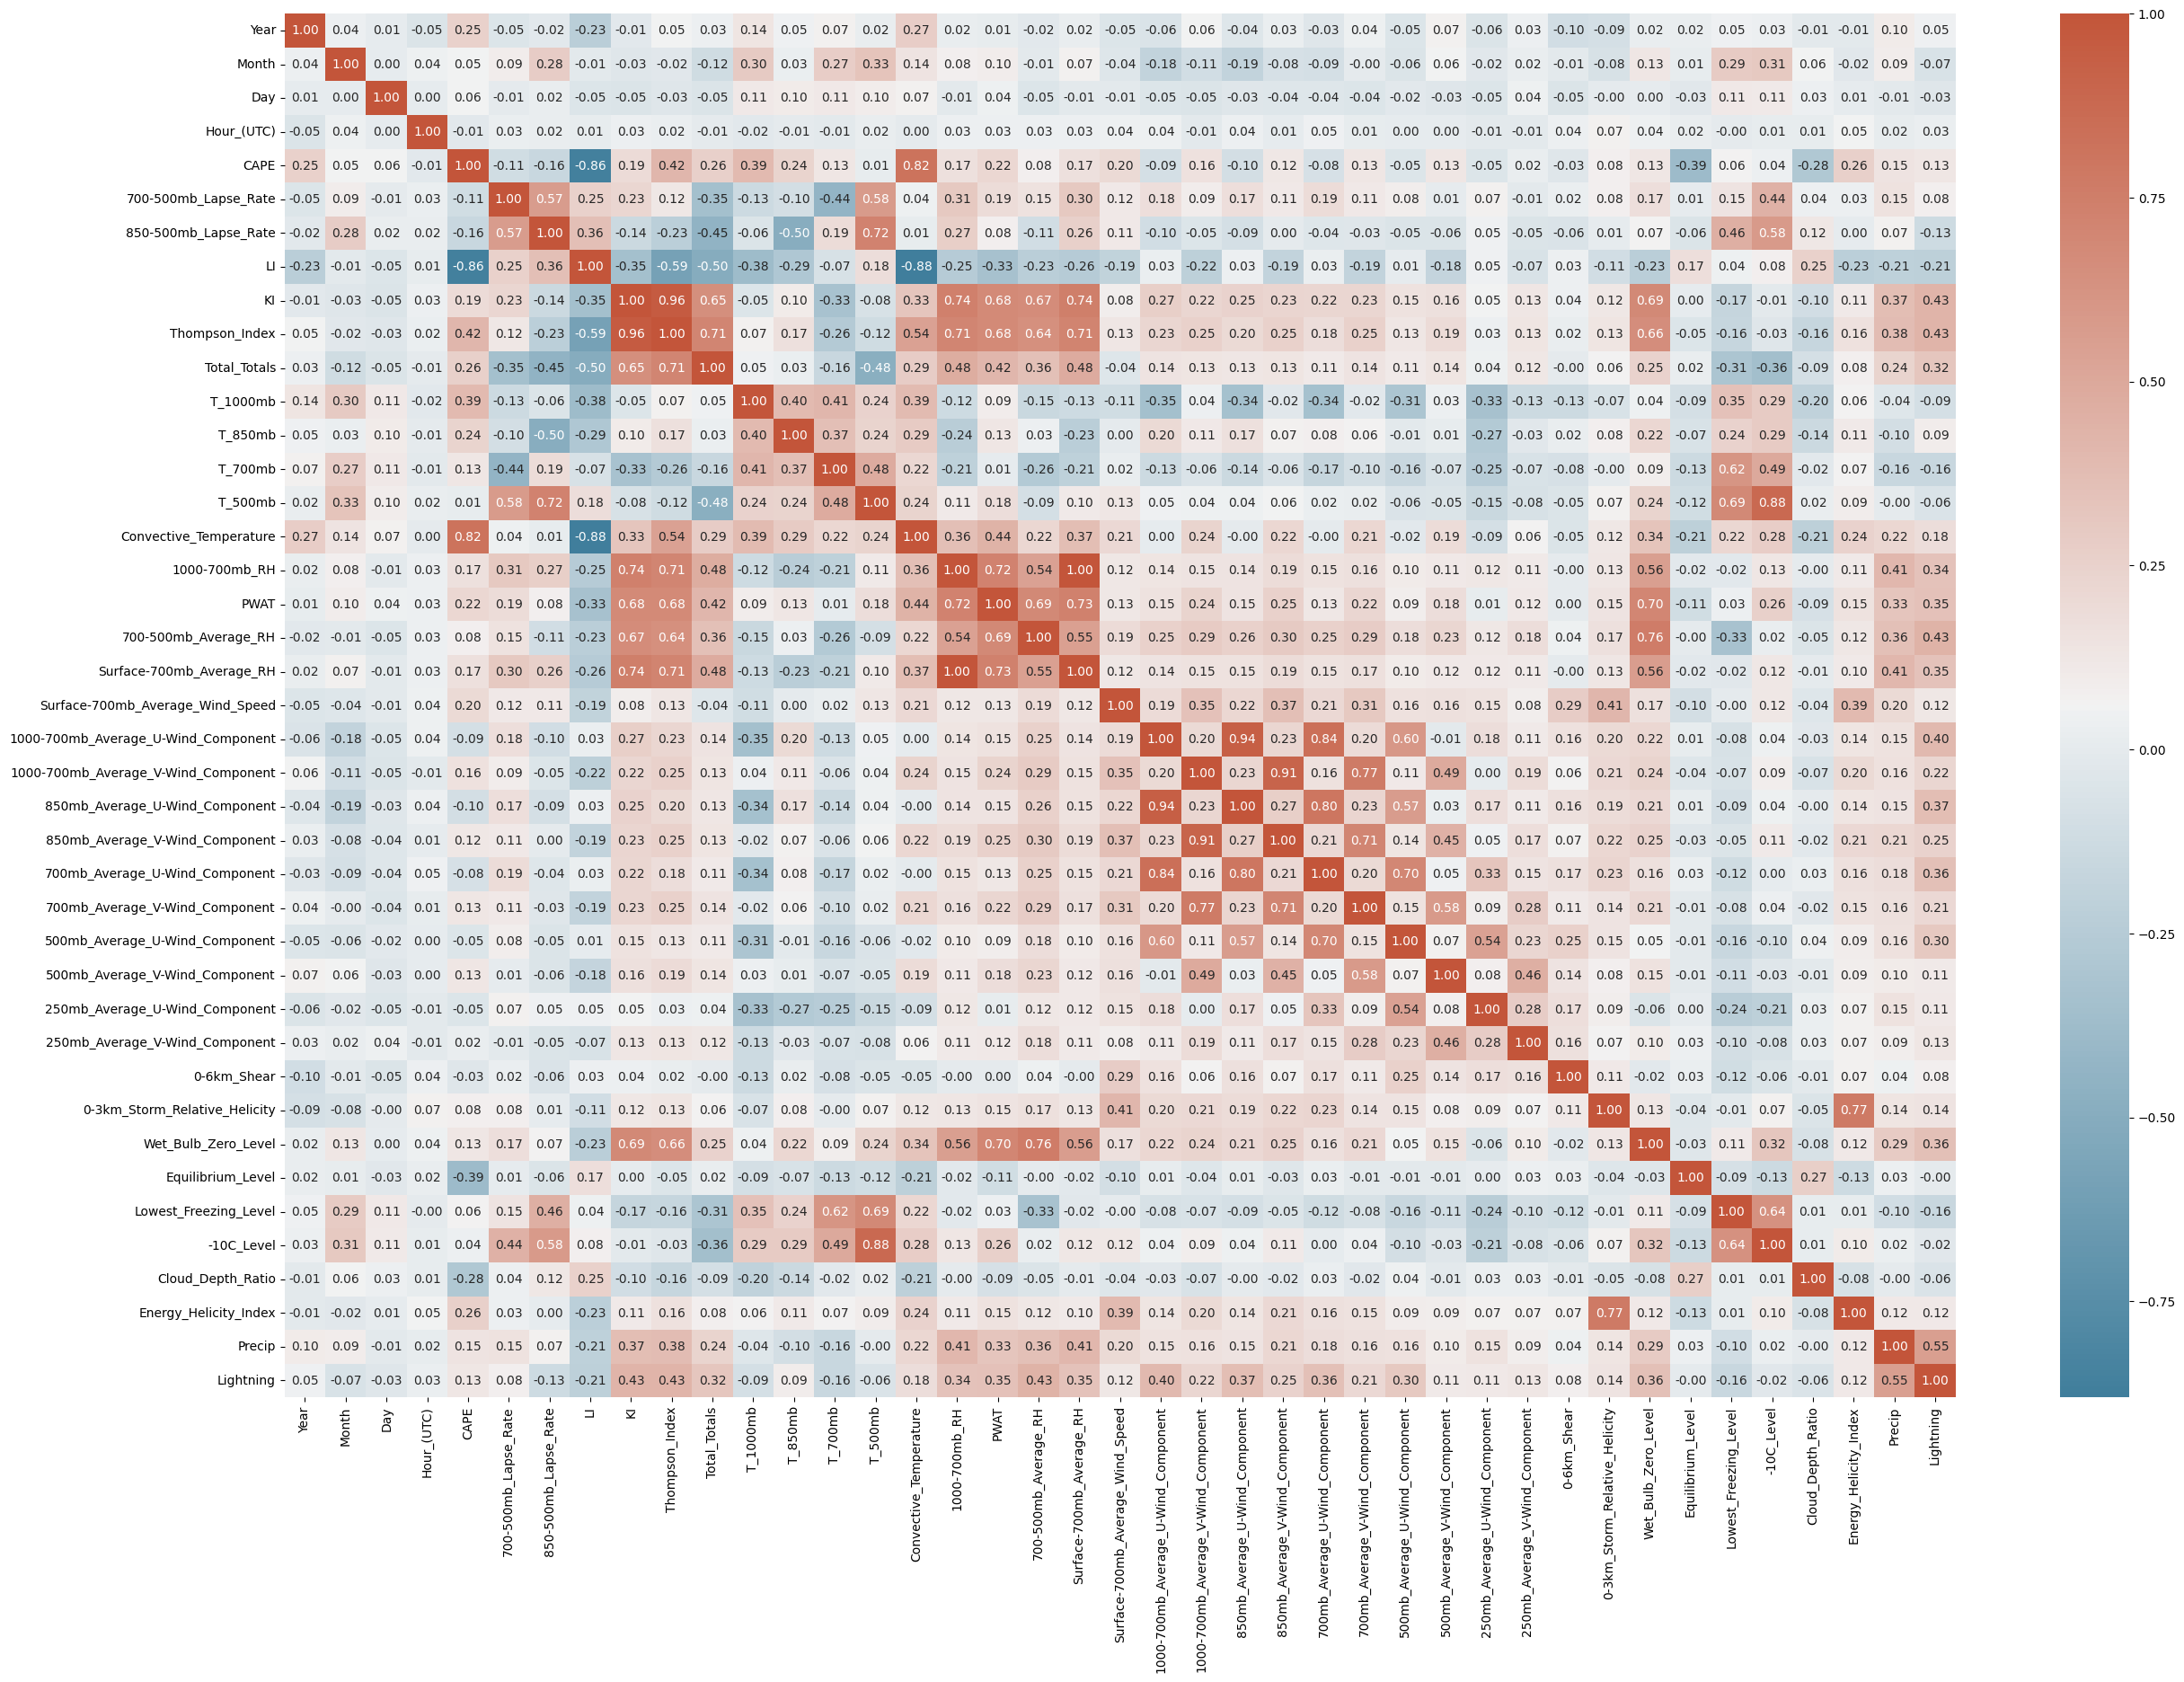

In [12]:
plt.figure(figsize=(30,20))
cmap = sns.diverging_palette(230, 20, as_cmap=True)
sns.heatmap(df.corr(),annot=True,fmt='.2f',cmap=cmap )
plt.show()

Histograms of Each Variable

<ipython-input-16-33eab74d11b2>:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  p = sns.distplot(df[column], ax=ax[rows][cols])
<ipython-input-16-33eab74d11b2>:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  p = sns.distplot(df[column], ax=ax[rows][cols])
<ipython-input-16-33eab74d11b2>:6: UserWarning: 

`distplot` is 

IndexError: index 13 is out of bounds for axis 0 with size 13

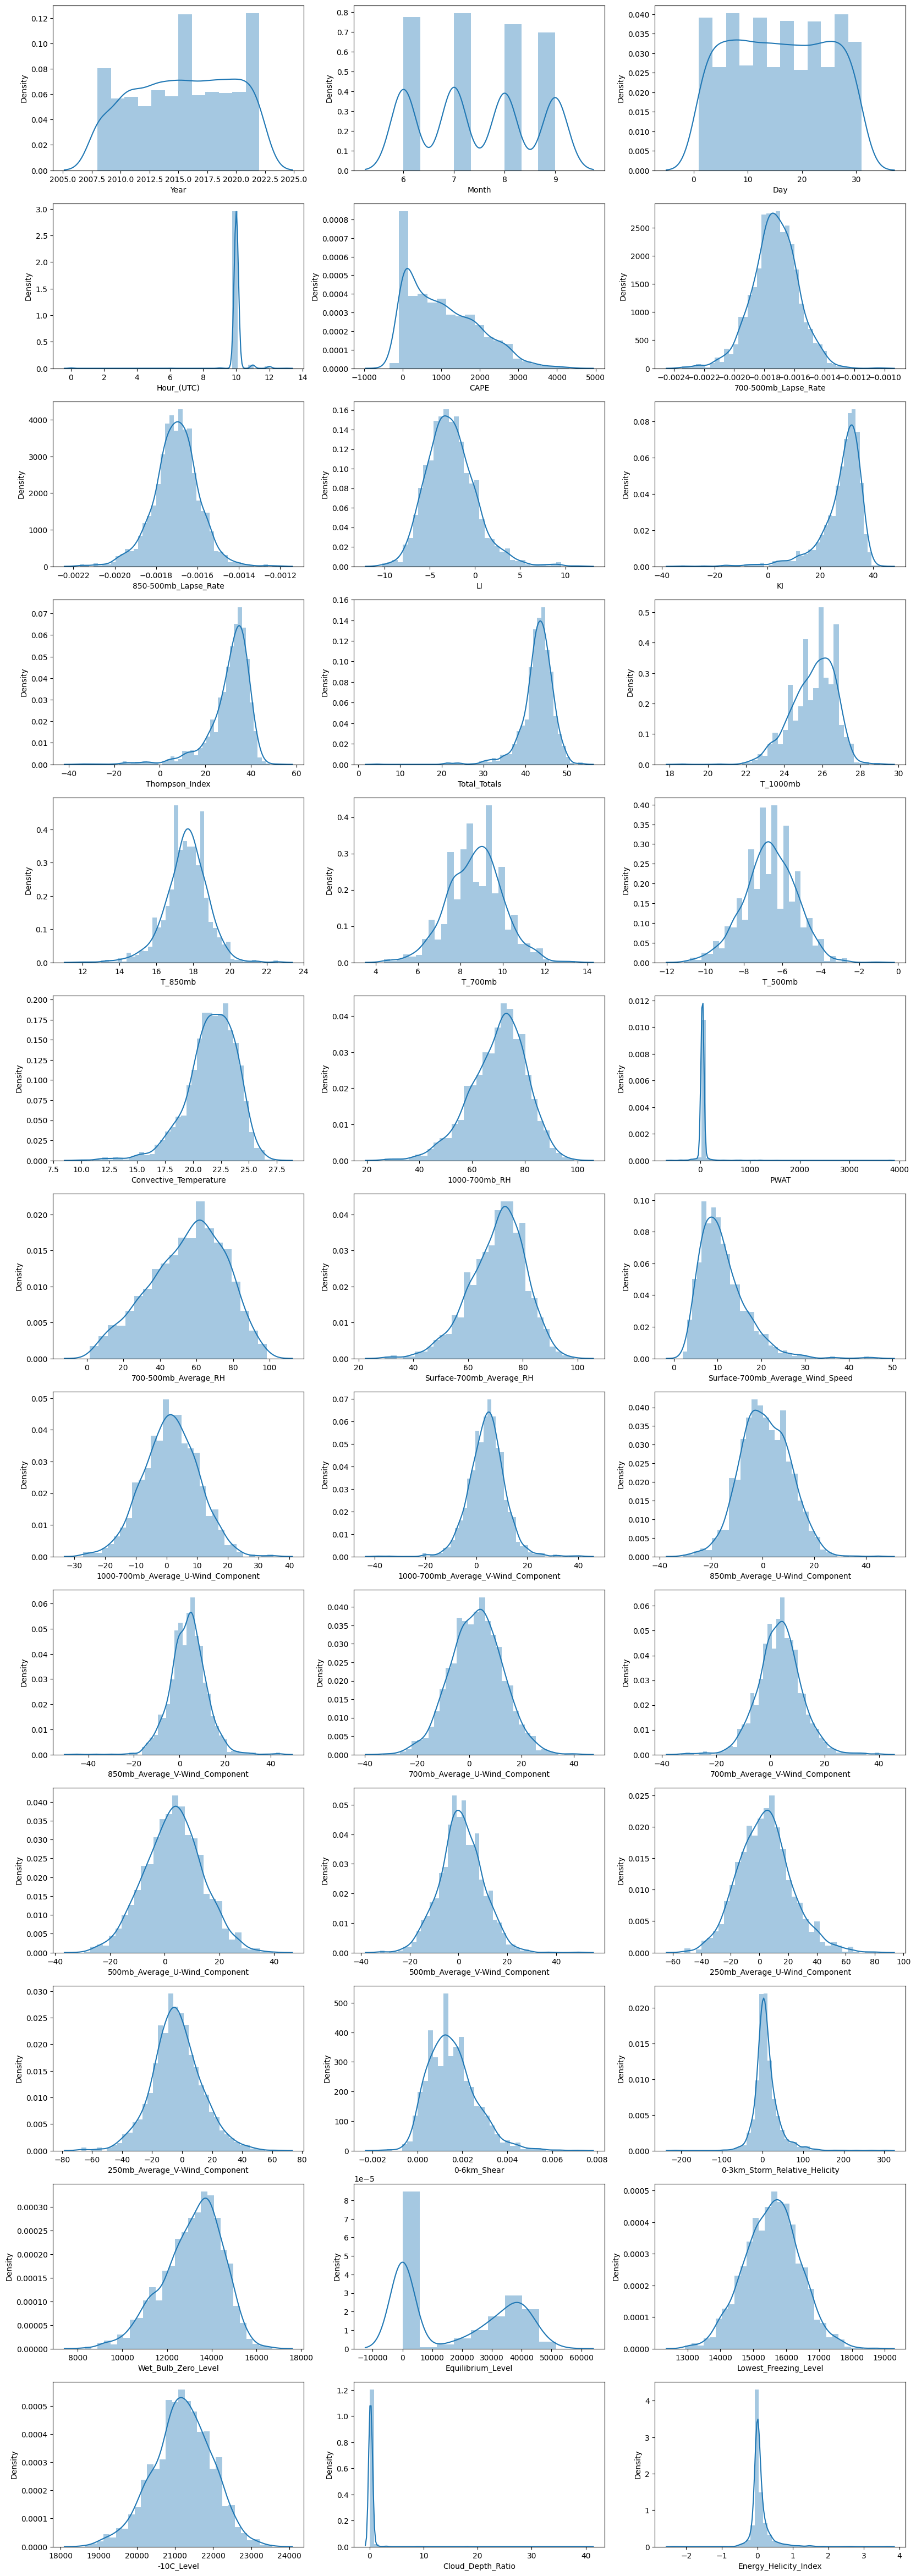

In [ ]:
f, ax = plt.subplots(nrows = 13, ncols = 3, figsize=(20,60))
distribution = df.columns
rows = 0
cols = 0
for i, column in enumerate(distribution):
    p = sns.distplot(df[column], ax=ax[rows][cols])
    cols += 1
    if cols == 3:
        cols = 0
        rows += 1

In [12]:
# prompt: create a new dataframe from df that only includes rows where df['CAPE'] > 0 and df['LI'] < 0

#df_CAPE = df[(df['CAPE'] > 0) & (df['LI'] < 4) & (df['1000-700mb_Average_U-Wind_Component']<0)]
df_CAPE = df[(df['CAPE'] > 0) & (df['LI'] < 4)]


In [ ]:
#interval = alt.selection_interval()

fig = alt.Chart(df_CAPE).mark_point().encode(
    x='LI',
    y='CAPE',
    color='Lightning'
)
final_plot = fig + fig.transform_regression('LI', 'CAPE').mark_line()
#).add_selection(
    #interval


final_plot

alt.LayerChart(...)

In [ ]:
dropdown = alt.binding_select(
    options=['LI', 'KI', 'Thompson_Index', 'Total_Totals', 'CAPE', 'M10C_Level', 'Month', '1000-700mb_Average_U-Wind_Component','700-500mb_Average_RH','Wet_Bulb_Zero_Level','Lightning', 'Precip'],
    name='X-axis '

)
xcol_param = alt.param(
    value='LI',
    bind=dropdown
)

ycol_param = alt.param(
    value='CAPE',
    bind=dropdown
)

alt.Chart(df_CAPE).mark_circle().encode(
    x=alt.X('x:Q', title=''),
    y=alt.Y('y:Q', title=''),
    color='Lightning'
).transform_calculate(
    x=f'datum[{xcol_param.name}]',
    y=f'datum[{ycol_param.name}]'
).add_params(
    xcol_param,
    ycol_param
)

alt.Chart(...)

In [ ]:
# Convert date column to an actual date and filter the data.
movies = (
    data.movies()
    .assign(Release_Date=lambda df: pd.to_datetime(df['Release_Date']))
    .query('1960 < Release_Date < 2010')
    .sample(1_000, random_state=90384))

select_year = alt.selection_interval(encodings=['x'])

bar_slider = alt.Chart(movies).mark_bar().encode(
    x='year(Release_Date)',
    y='count()').properties(height=50).add_selection(select_year)

scatter_plot = alt.Chart(movies).mark_circle().encode(
    x='Rotten_Tomatoes_Rating',
    y='IMDB_Rating',
    opacity=alt.condition(
        select_year,
        alt.value(0.7), alt.value(0.1)))

scatter_plot & bar_slider

Text(1, 17, 'y = -182.62 + -408.41x')

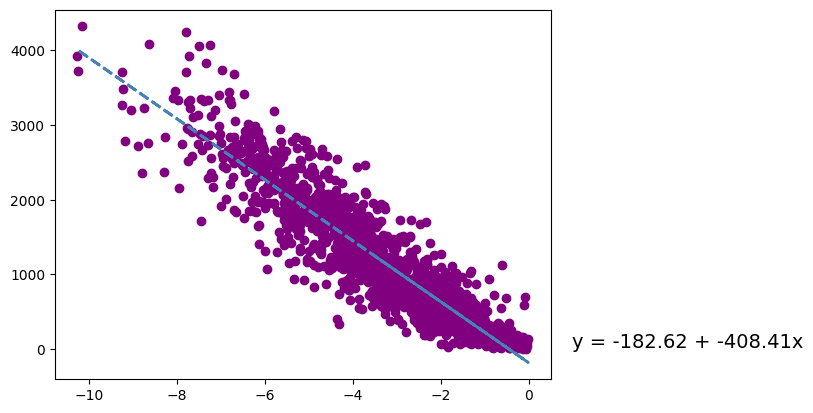

In [ ]:
#find line of best fit
x = df_CAPE['LI']
y = df_CAPE['CAPE']

a, b = np.polyfit(x, y, 1)

#add points to plot
plt.scatter(x, y, color='purple')

#add line of best fit to plot
plt.plot(x, a*x+b, color='steelblue', linestyle='--', linewidth=2)

#add fitted regression equation to plot
plt.text(1, 17, 'y = ' + '{:.2f}'.format(b) + ' + {:.2f}'.format(a) + 'x', size=14)

In [13]:
import statsmodels.api as sm

#define response variable
y = df_CAPE['CAPE']

#define predictor variables
x = df_CAPE['LI']

#add constant to predictor variables
x = sm.add_constant(x)

#fit linear regression model
model = sm.OLS(y, x).fit()

#view model summary
print(model.summary())

NameError: name 'df_CAPE' is not defined

Breakdown of Hail vs. No Hail days. Note the highly inbalanced dataset

In [14]:
df['Lightning'].value_counts()

1.0    864
0.0    672
Name: Lightning, dtype: int64

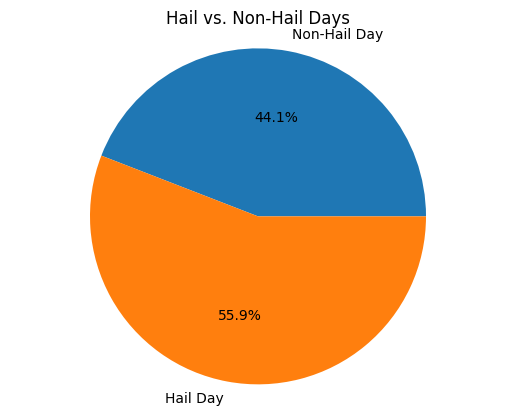

In [ ]:
Tasks = [727, 921]

my_labels = 'Non-Hail Day','Hail Day'
plt.pie(Tasks, labels=my_labels,autopct='%1.1f%%')
plt.title('Hail vs. Non-Hail Days')
plt.axis('equal')
plt.show()

In [15]:
df.describe()

Year        Month          Day   Hour_(UTC)         CAPE  700-500mb_Lapse_Rate  850-500mb_Lapse_Rate           LI           KI  Thompson_Index  Total_Totals     T_1000mb      T_850mb      T_700mb      T_500mb  Convective_Temperature  1000-700mb_RH         PWAT  700-500mb_Average_RH  Surface-700mb_Average_RH  Surface-700mb_Average_Wind_Speed  1000-700mb_Average_U-Wind_Component  1000-700mb_Average_V-Wind_Component  850mb_Average_U-Wind_Component  850mb_Average_V-Wind_Component  700mb_Average_U-Wind_Component  700mb_Average_V-Wind_Component  500mb_Average_U-Wind_Component  500mb_Average_V-Wind_Component  250mb_Average_U-Wind_Component  250mb_Average_V-Wind_Component  0-6km_Shear  0-3km_Storm_Relative_Helicity  Wet_Bulb_Zero_Level  Equilibrium_Level  Lowest_Freezing_Level    -10C_Level  Cloud_Depth_Ratio  Energy_Helicity_Index       Precip   Lightning
count  1536.000000  1536.000000  1536.000000  1536.000000  1536.000000           1536.000000           1536.000000  1536.000000  1536.000000     1536.000000   1536.000000  1536.000000  1536.000000  1536.000000  1536.000000             1536.000000    1536.000000  1536.000000           1536.000000               1536.000000                       1536.000000                          1536.000000                          1536.000000                     1536.000000                     1536.000000                     1536.000000                     1536.000000                     1536.000000                     1536.000000                     1536.000000                     1536.000000  1536.000000                    1536.000000          1536.000000        1536.000000            1536.000000   1536.000000        1536.000000            1536.000000  1536.000000  1536.00000
mean   2015.236979     7.457682    15.723958    10.022786  1023.717645             -0.001728             -0.001704    -2.597848    27.820417       30.418265     42.873249    25.506230    17.621445     8.689089    -6.658854               21.599468      69.972262    46.416627             54.670332                 70.656665                         11.256739                             1.368570                             4.110794                        1.062708                        3.759980                        2.786230                        3.305671                        3.243203                        1.028529                        3.975306                       -3.546536     0.001547                      10.184992         13113.536245       16179.666735           15562.393698  21186.038245           0.231617               0.078522     0.694010     0.56250
std       4.285248     1.114094     8.787723     0.533077   894.007299              0.000154              0.000112     2.771800     8.189112        9.523720      3.877040     1.146065     1.159922     1.300520     1.360829                2.263308      10.636887     8.395232             20.539369                 10.269454                          5.450931                             8.925564                             7.053236                        9.513129                        7.927323                        9.954166                        8.116221                       10.609410                        8.981850                       18.692785                       16.615132     0.001060                      31.281698          1334.659225       17679.196373             843.648844    782.208088           0.582656               0.280909     0.460975     0.49624
min    2008.000000     6.000000     1.000000     0.000000  -346.219553             -0.002345             -0.002168   -10.262901   -24.300000      -32.251644      4.330000    18.600000    11.800000     4.400000   -11.100000               10.020879      26.704276     0.957534              3.737552                 29.394886                          2.040772                           -27.197579                           -38.840253                      -29.070000                      -45.120000                    

In [13]:
#Split into Train/Test Data
columns_drop = ['Year', 'Month', 'Day', 'Hour_(UTC)', 'Date', 'Precip']
#columns_drop = ['Year', 'Month', 'Day', 'Hour (UTC)', 'CAPE', 'PWAT', 'Equilibrium_Level', 'Cloud_Depth_Ratio', 'EHI', 'LI', 'KI', 'Surface_700_RH']
df.drop(columns_drop, inplace=True, axis=1)

#Model 1 (all variables, no transformations)
X = df.loc[:, df.columns != 'Lightning']
y = df.loc[:, df.columns == 'Lightning']

#X = (X-X.mean()) / X.std()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify = y, random_state=7)

In [20]:
y_test

Lightning
903         0.0
533         1.0
4762        0.0
4031        1.0
2963        0.0
...         ...
5084        1.0
1586        1.0
3282        0.0
2625        1.0
1618        1.0

[461 rows x 1 columns]

Using SMOTE technique for synthetic resampling of unbalanced dataset

In [ ]:
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=42)
X_train_SMOTE, y_train_SMOTE = smote.fit_resample(X_train, y_train)

# All Predictors Without SMOTE

In [14]:
# First model: Includes all predictor variables with no transforms on the non-resampled dataset
model = sm.Logit(y_train,X_train).fit()
print(model.summary())

         Current function value: 0.482920
         Iterations: 35
                           Logit Regression Results                           
Dep. Variable:              Lightning   No. Observations:                 1075
Model:                          Logit   Df Residuals:                     1040
Method:                           MLE   Df Model:                           34
Date:                Mon, 26 Feb 2024   Pseudo R-squ.:                  0.2953
Time:                        22:56:39   Log-Likelihood:                -519.14
converged:                      False   LL-Null:                       -736.63
Covariance Type:            nonrobust   LLR p-value:                 4.517e-71
                                          coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------
CAPE                                    0.0002      0.000      0.858      0.391      -0.000   

/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [15]:
from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

#Fit the Model with Sklearn
logreg = LogisticRegression(fit_intercept = True)    # default intercept = true
#logreg = LogisticRegression(fit_intercept = False)

logreg.fit(X_train, y_train.values.ravel())
y_pred_test = logreg.predict(X_test)
y_pred_train = logreg.predict(X_train)
print("Modeling complete")

Modeling complete


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [16]:
#Print Test Set Accuracy
print("\n---Test Set Accuracy")
print(logreg.score(X_test, y_test))

#Confusion Matrix
print("\n---Confusion Matrix")
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred_test)
print(confusion_matrix)

#Classification Report
print("\n---Classification Report")
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred_test))

#An attempt at a regression model summary
print("\n---An attempt at a regression model summary")

import sklearn.metrics as metrics
def regression_results(y_true, y_pred):

    # Regression metrics
    explained_variance=metrics.explained_variance_score(y_true, y_pred)
    mean_absolute_error=metrics.mean_absolute_error(y_true, y_pred)
    mse=metrics.mean_squared_error(y_true, y_pred)
    mean_squared_log_error=metrics.mean_squared_log_error(y_true, y_pred)
    median_absolute_error=metrics.median_absolute_error(y_true, y_pred)
    r2=metrics.r2_score(y_true, y_pred)

    print('explained_variance: ', round(explained_variance,4))
    print('mean_squared_log_error: ', round(mean_squared_log_error,4))
    print('r2: ', round(r2,4))
    print('MAE: ', round(mean_absolute_error,4))
    print('MSE: ', round(mse,4))
    print('RMSE: ', round(np.sqrt(mse),4))


regression_results(y_test, y_pred_test)


---Test Set Accuracy
0.7635574837310195

---Confusion Matrix
[[141  61]
 [ 48 211]]

---Classification Report
              precision    recall  f1-score   support

         0.0       0.75      0.70      0.72       202
         1.0       0.78      0.81      0.79       259

    accuracy                           0.76       461
   macro avg       0.76      0.76      0.76       461
weighted avg       0.76      0.76      0.76       461


---An attempt at a regression model summary
explained_variance:  0.0428
mean_squared_log_error:  0.1136
r2:  0.0395
MAE:  0.2364
MSE:  0.2364
RMSE:  0.4863


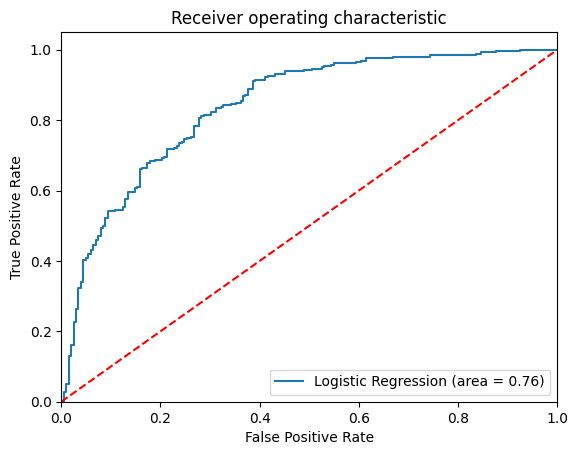

In [ ]:
#Make the Roc Curve for test data
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

logit_roc_auc = roc_auc_score(y_test, logreg.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, logreg.predict_proba(X_test)[:,1])

plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC', transparent=True)
plt.show()

# All Predictors with SMOTE

In [ ]:
# First model: Includes all predictor variables with no transforms on the SMOTE dataset
model = sm.Logit(y_train_SMOTE,X_train_SMOTE).fit()
print(model.summary())

         Current function value: 0.421964
         Iterations: 35
                           Logit Regression Results                           
Dep. Variable:                   Hail   No. Observations:                 2636
Model:                          Logit   Df Residuals:                     2607
Method:                           MLE   Df Model:                           28
Date:                Tue, 07 Dec 2021   Pseudo R-squ.:                  0.3912
Time:                        20:22:37   Log-Likelihood:                -1112.3
converged:                      False   LL-Null:                       -1827.1
Covariance Type:            nonrobust   LLR p-value:                7.382e-284
                            coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------
CAPE                     -0.0004      0.000     -2.816      0.005      -0.001      -0.000
LR_700_500             6265.8136

/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



In [ ]:
#Fit the Model with Sklearn
logreg = LogisticRegression(fit_intercept = True)    # default intercept = true
#logreg = LogisticRegression(fit_intercept = False)

logreg.fit(X_train_SMOTE, y_train_SMOTE.values.ravel())
y_pred_test = logreg.predict(X_test)
y_pred_train_SMOTE = logreg.predict(X_train_SMOTE)
print("Modeling complete")

Modeling complete


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



In [ ]:
#Print Test Set Accuracy
print("\n---Test Set Accuracy")
print(logreg.score(X_test, y_test))

#Confusion Matrix
print("\n---Confusion Matrix")
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred_test)
print(confusion_matrix)

#Classification Report
print("\n---Classification Report")
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred_test))

#An attempt at a regression model summary
print("\n---An attempt at a regression model summary")

import sklearn.metrics as metrics
def regression_results(y_true, y_pred):

    # Regression metrics
    explained_variance=metrics.explained_variance_score(y_true, y_pred)
    mean_absolute_error=metrics.mean_absolute_error(y_true, y_pred)
    mse=metrics.mean_squared_error(y_true, y_pred)
    mean_squared_log_error=metrics.mean_squared_log_error(y_true, y_pred)
    median_absolute_error=metrics.median_absolute_error(y_true, y_pred)
    r2=metrics.r2_score(y_true, y_pred)

    print('explained_variance: ', round(explained_variance,4))
    print('mean_squared_log_error: ', round(mean_squared_log_error,4))
    print('r2: ', round(r2,4))
    print('MAE: ', round(mean_absolute_error,4))
    print('MSE: ', round(mse,4))
    print('RMSE: ', round(np.sqrt(mse),4))


regression_results(y_test, y_pred_test)


---Test Set Accuracy
0.7125850340136054

---Confusion Matrix
[[404 162]
 [  7  15]]

---Classification Report
              precision    recall  f1-score   support

         0.0       0.98      0.71      0.83       566
         1.0       0.08      0.68      0.15        22

    accuracy                           0.71       588
   macro avg       0.53      0.70      0.49       588
weighted avg       0.95      0.71      0.80       588


---An attempt at a regression model summary
explained_variance:  -5.051
mean_squared_log_error:  0.1381
r2:  -6.9804
MAE:  0.2874
MSE:  0.2874
RMSE:  0.5361


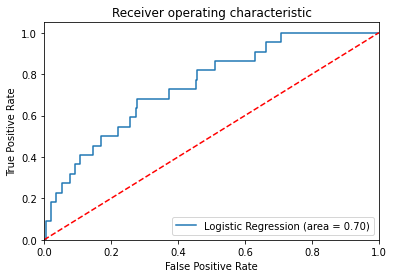

In [ ]:
#Make the Roc Curve for test data
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

logit_roc_auc = roc_auc_score(y_test, logreg.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, logreg.predict_proba(X_test)[:,1])

plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC', transparent=True)
plt.show()

# P-Value and Meteorological Insight

['CAPE' '700-500mb_Lapse_Rate' '850-500mb_Lapse_Rate' 'LI' 'KI'
 'Thompson_Index' 'Total_Totals' 'T_1000mb' 'T_850mb' 'T_700mb' 'T_500mb'
 'Convective_Temperature' '1000-700mb_RH' 'PWAT' '700-500mb_Average_RH'
 'Surface-700mb_Average_RH' 'Surface-700mb_Average_Wind_Speed'
 '1000-700mb_Average_U-Wind_Component'
 '1000-700mb_Average_V-Wind_Component' '850mb_Average_U-Wind_Component'
 '850mb_Average_V-Wind_Component' '700mb_Average_U-Wind_Component'
 '700mb_Average_V-Wind_Component' '500mb_Average_U-Wind_Component'
 '500mb_Average_V-Wind_Component' '250mb_Average_U-Wind_Component'
 '250mb_Average_V-Wind_Component' '0-6km_Shear'
 '0-3km_Storm_Relative_Helicity' 'Wet_Bulb_Zero_Level' 'Equilibrium_Level'
 'Lowest_Freezing_Level' '-10C_Level' 'Cloud_Depth_Ratio'
 'Energy_Helicity_Index' 'Precip']

In [17]:
formula = 'Lightning ~ Thompson_Index + Q("1000-700mb_Average_U-Wind_Component") + Q("700-500mb_Average_RH")'
y1, X1 = dmatrices(formula, data = df , return_type ='dataframe')
#X1 = (X1-X1.mean())/X1.std()
#X1['Intercept'] = 1

X1_train , X1_test , y1_train , y1_test = train_test_split ( X1, y1, test_size =0.2 , stratify = y1, random_state =42)
X1_train.head(10)

#from imblearn.over_sampling import SMOTE
#smote = SMOTE(random_state=42)
#X1_res, y1_res = smote.fit_resample(X1_train, y1_train)

Intercept  Thompson_Index  Q("1000-700mb_Average_U-Wind_Component")  Q("700-500mb_Average_RH")
2557        1.0       34.576844                                 18.627702                  46.726330
3617        1.0       36.908370                                 15.986612                  21.199221
2991        1.0        4.444972                                -10.059167                  14.623887
2940        1.0       37.184416                                -12.573481                  35.094667
4810        1.0       38.004131                                  5.199797                  65.078963
1617        1.0       36.664115                                  7.241857                  52.778307
220         1.0       34.202224                                  9.498332                  87.372601
4815        1.0      -32.251644                                 -4.532375                   7.898784
4747        1.0       31.411704                                  4.928104                  40.570754
4377        1.0       38.250436                                 11.446095                  68.185419

In [18]:
model1 = sm.Logit(y1_train,X1_train).fit()
print(model1.summary())

Optimization terminated successfully.
         Current function value: 0.477209
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:              Lightning   No. Observations:                 1228
Model:                          Logit   Df Residuals:                     1224
Method:                           MLE   Df Model:                            3
Date:                Mon, 26 Feb 2024   Pseudo R-squ.:                  0.3036
Time:                        22:57:07   Log-Likelihood:                -586.01
converged:                       True   LL-Null:                       -841.50
Covariance Type:            nonrobust   LLR p-value:                1.991e-110
                                               coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------
Intercept                                   -4.7

In [48]:
from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

#Fit the Model with Sklearn
#logreg = LogisticRegression(fit_intercept = True)    # default intercept = true
logreg = LogisticRegression(fit_intercept = False)

logreg.fit(X1_train, y1_train.values.ravel())
y1_pred_test = logreg.predict(X1_test)
y1_pred_train = logreg.predict(X1_train)
print("Modeling complete")
y1_pred_test
logreg_predict = logreg.predict_proba(X1_test)
print(type(logreg_predict))

Modeling complete
<class 'numpy.ndarray'>


In [39]:
df_logreg_predict = pd.DataFrame(logreg_predict)
df_logreg_predict
#df_logreg_predict['lightning'] = y1_test['Lightning']
df_logreg_predict
y1_test_reset = y1_test.reset_index()
df_logreg_predict = pd.concat([df_logreg_predict, y1_test_reset['Lightning']], axis=1)
df_logreg_predict

#y1_test['Lightning']

0         1  Lightning
0    0.309281  0.690719        0.0
1    0.302248  0.697752        1.0
2    0.124636  0.875364        1.0
3    0.917344  0.082656        0.0
4    0.428217  0.571783        0.0
..        ...       ...        ...
456  0.792702  0.207298        1.0
457  0.976589  0.023411        0.0
458  0.984382  0.015618        0.0
459  0.879678  0.120322        1.0
460  0.605857  0.394143        0.0

[461 rows x 3 columns]

In [49]:
#Print Test Set Accuracy
print("\n---Test Set Accuracy")
print(logreg.score(X1_test, y1_test))

#Confusion Matrix
print("\n---Confusion Matrix")
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y1_test, y1_pred_test)
print(confusion_matrix)

#Classification Report
print("\n---Classification Report")
from sklearn.metrics import classification_report
print(classification_report(y1_test, y1_pred_test))

#An attempt at a regression model summary
print("\n---An attempt at a regression model summary")

import sklearn.metrics as metrics
def regression_results(y_true, y_pred):

    # Regression metrics
    explained_variance=metrics.explained_variance_score(y_true, y_pred)
    mean_absolute_error=metrics.mean_absolute_error(y_true, y_pred)
    mse=metrics.mean_squared_error(y_true, y_pred)
    mean_squared_log_error=metrics.mean_squared_log_error(y_true, y_pred)
    median_absolute_error=metrics.median_absolute_error(y_true, y_pred)
    r2=metrics.r2_score(y_true, y_pred)

    print('explained_variance: ', round(explained_variance,4))
    print('mean_squared_log_error: ', round(mean_squared_log_error,4))
    print('r2: ', round(r2,4))
    print('MAE: ', round(mean_absolute_error,4))
    print('MSE: ', round(mse,4))
    print('RMSE: ', round(np.sqrt(mse),4))


regression_results(y1_test, y1_pred_test)


---Test Set Accuracy
0.7012987012987013

---Confusion Matrix
[[ 74  61]
 [ 31 142]]

---Classification Report
              precision    recall  f1-score   support

         0.0       0.70      0.55      0.62       135
         1.0       0.70      0.82      0.76       173

    accuracy                           0.70       308
   macro avg       0.70      0.68      0.69       308
weighted avg       0.70      0.70      0.69       308


---An attempt at a regression model summary
explained_variance:  -0.1747
mean_squared_log_error:  0.1435
r2:  -0.2133
MAE:  0.2987
MSE:  0.2987
RMSE:  0.5465


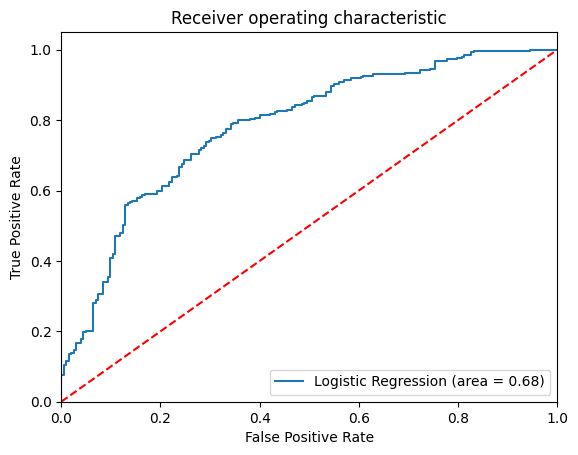

In [28]:
#Make the Roc Curve for test data
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

logit_roc_auc = roc_auc_score(y1_test, logreg.predict(X1_test))
fpr, tpr, thresholds = roc_curve(y1_test, logreg.predict_proba(X1_test)[:,1])

plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC', transparent=True)
plt.show()

# RFE Approach

In [ ]:
from sklearn.feature_selection import RFE
from sklearn import linear_model
model_a = linear_model.LogisticRegression()



rfe = RFE(model_a, n_features_to_select=8, step = 1)
fit = rfe.fit(X_train_SMOTE, y_train_SMOTE.values.ravel())

f = fit.get_support(1) #the most important features
# final_features = data[data.columns[f]] # final features: this gives wrong results
final_features = X[X.columns[f]] # final features

print("Num Features: %d" % fit.n_features_)
print("Selected Features: %s" % final_features.columns)
print("Score: %2.3f" % fit.score(X,y.values.ravel()))

print("----------")

#Selected 'Ed', 'LF', 'MF', 'Wealth', 'Time'

# summarize all features
for i in range(X.shape[1]):
	print('Column: %d, %s, Selected %s, Rank: %.3f' % (i, X.columns.values[i],rfe.support_[i], rfe.ranking_[i]))

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

/usr/local/lib/python3.7/dist-packages/sklearn/lin

Num Features: 8
Selected Features: Index(['Thompson', 'Total_Totals', 'T_850mb', 'T_700mb', 'T_500mb', 'Surface_700_windspeed', 'v_comp_1000_700', 'u_comp_850'], dtype='object')
Score: 0.715
----------
Column: 0, CAPE, Selected False, Rank: 18.000
Column: 1, LR_700_500, Selected False, Rank: 22.000
Column: 2, LR_850_500, Selected False, Rank: 21.000
Column: 3, Thompson, Selected True, Rank: 1.000
Column: 4, Total_Totals, Selected True, Rank: 1.000
Column: 5, T_1000mb, Selected False, Rank: 2.000
Column: 6, T_850mb, Selected True, Rank: 1.000
Column: 7, T_700mb, Selected True, Rank: 1.000
Column: 8, T_500mb, Selected True, Rank: 1.000
Column: 9, Convective_temp, Selected False, Rank: 14.000
Column: 10, RH_1000_700, Selected False, Rank: 3.000
Column: 11, PWAT, Selected False, Rank: 19.000
Column: 12, RH_700_500, Selected False, Rank: 11.000
Column: 13, Surface_700_windspeed, Selected True, Rank: 1.000
Column: 14, u_comp_1000_700, Selected False, Rank: 6.000
Column: 15, v_comp_1000_700, 

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



In [ ]:
model = linear_model.LogisticRegression()


print("\nSearch the best k features for k = 1 to 27\n")

for k in range(1, 10):
  rfe = RFE(model, n_features_to_select = k, step=1)
  fit = rfe.fit(X, y)

  f = fit.get_support(1) #the most important features

  # final_features = data[data.columns[f]] # final features: this gives wrong results
  final_features = X[X.columns[f]] # final features

  print("Num Features: %d" % fit.n_features_)
  print("Selected Features: %s" % final_features.columns)
  print("Score: %2.2f" % fit.score(X,y))
  print("----------")

In [ ]:
formula = 'Hail ~ Thompson + Total_Totals + T_1000mb + T_850mb + T_700mb + T_500mb + v_comp_1000_700 + v_comp_850'
y2, X2 = dmatrices(formula, data = df , return_type ='dataframe')
#X1 = (X1-X1.mean())/X1.std()
#X1['Intercept'] = 1

X2_train , X2_test , y2_train , y2_test = train_test_split ( X2, y2, test_size =0.3 , stratify = y2, random_state =42)

from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=42)
X2_res, y2_res = smote.fit_resample(X2_train, y2_train)

model2 = sm.Logit(y2_res, X2_res).fit()
print(model2.summary())
y2_test.describe()

Optimization terminated successfully.
         Current function value: 0.480447
         Iterations 8
                           Logit Regression Results                           
Dep. Variable:                   Hail   No. Observations:                 2636
Model:                          Logit   Df Residuals:                     2627
Method:                           MLE   Df Model:                            8
Date:                Tue, 07 Dec 2021   Pseudo R-squ.:                  0.3069
Time:                        20:24:07   Log-Likelihood:                -1266.5
converged:                       True   LL-Null:                       -1827.1
Covariance Type:            nonrobust   LLR p-value:                9.346e-237
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept         -17.0769      1.382    -12.352      0.000     -19.786     -14.367
Thompson      

Hail
count  588.000000
mean     0.037415
std      0.189938
min      0.000000
25%      0.000000
50%      0.000000
75%      0.000000
max      1.000000

In [ ]:

#Fit the Model with Sklearn
logreg = LogisticRegression(fit_intercept = True)    # default intercept = true
#logreg = LogisticRegression(fit_intercept = False)

logreg.fit(X2_res, y2_res.values.ravel())
y2_pred_test = logreg.predict(X2_test)
y2_pred_train = logreg.predict(X2_res)
print("Modeling complete")

Modeling complete


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



In [ ]:
#Print Test Set Accuracy
print("\n---Test Set Accuracy")
print(logreg.score(X2_test, y2_test))

#Confusion Matrix
print("\n---Confusion Matrix")
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y2_test, y2_pred_test)
print(confusion_matrix)

#Classification Report
print("\n---Classification Report")
from sklearn.metrics import classification_report
print(classification_report(y2_test, y2_pred_test))

#An attempt at a regression model summary
print("\n---An attempt at a regression model summary")

import sklearn.metrics as metrics
def regression_results(y_true, y_pred):

    # Regression metrics
    explained_variance=metrics.explained_variance_score(y_true, y_pred)
    mean_absolute_error=metrics.mean_absolute_error(y_true, y_pred)
    mse=metrics.mean_squared_error(y_true, y_pred)
    mean_squared_log_error=metrics.mean_squared_log_error(y_true, y_pred)
    median_absolute_error=metrics.median_absolute_error(y_true, y_pred)
    r2=metrics.r2_score(y_true, y_pred)

    print('explained_variance: ', round(explained_variance,4))
    print('mean_squared_log_error: ', round(mean_squared_log_error,4))
    print('r2: ', round(r2,4))
    print('MAE: ', round(mean_absolute_error,4))
    print('MSE: ', round(mse,4))
    print('RMSE: ', round(np.sqrt(mse),4))


regression_results(y2_test, y2_pred_test)


---Test Set Accuracy
0.7125850340136054

---Confusion Matrix
[[405 161]
 [  8  14]]

---Classification Report
              precision    recall  f1-score   support

         0.0       0.98      0.72      0.83       566
         1.0       0.08      0.64      0.14        22

    accuracy                           0.71       588
   macro avg       0.53      0.68      0.48       588
weighted avg       0.95      0.71      0.80       588


---An attempt at a regression model summary
explained_variance:  -5.1005
mean_squared_log_error:  0.1381
r2:  -6.9804
MAE:  0.2874
MSE:  0.2874
RMSE:  0.5361


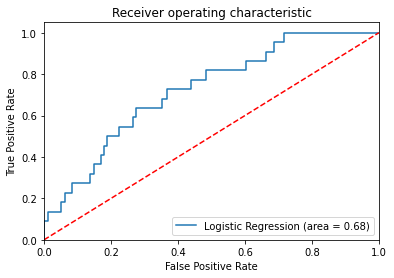

In [ ]:
#Make the Roc Curve for test data
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

logit_roc_auc = roc_auc_score(y2_test, logreg.predict(X2_test))
fpr, tpr, thresholds = roc_curve(y2_test, logreg.predict_proba(X2_test)[:,1])

plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC', transparent=True)
plt.show()

# Using PCA for Feature Selection

Eigenvalues:
[1.02670283e+01 4.72223000e+00 2.13331725e+00 1.94909593e+00
 1.61560544e+00 1.24821025e+00 9.84049439e-01 9.14747375e-01
 7.72695007e-01 7.29487185e-01 5.71877363e-01 5.48941374e-01
 4.61279482e-01 3.88891595e-01 3.56114150e-01 2.47074334e-01
 1.86893434e-01 1.62740764e-01 1.31892738e-01 1.18707455e-01
 1.10293967e-01 1.02003493e-01 8.83954778e-02 7.77191536e-02
 5.26170460e-02 3.78402108e-02 3.49619056e-02 8.84967094e-05
 2.75937036e-05]

Variances (Percentage):
[3.53854550e+01 1.62752310e+01 7.35250744e+00 6.71758609e+00
 5.56820651e+00 4.30197391e+00 3.39154001e+00 3.15268949e+00
 2.66310404e+00 2.51418768e+00 1.97098325e+00 1.89193404e+00
 1.58980612e+00 1.34032026e+00 1.22735235e+00 8.51545111e-01
 6.44130808e-01 5.60888295e-01 4.54570148e-01 4.09126887e-01
 3.80129685e-01 3.51556450e-01 3.04656238e-01 2.67860139e-01
 1.81345377e-01 1.30416810e-01 1.20496691e-01 3.05005134e-04
 9.51020814e-05]



Text(0, 0.5, 'Explained variance (%)')

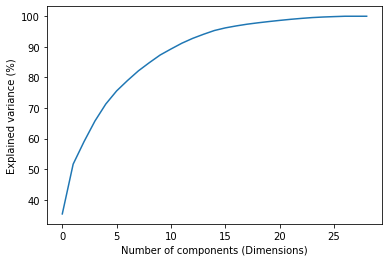

In [ ]:
# Do feature scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_scaled = sc.fit_transform(X)

# Apply PCA
from sklearn.decomposition import PCA
pca = PCA(n_components=None)
pca.fit(X_scaled)

# Get the eigenvalues
print("Eigenvalues:")
print(pca.explained_variance_)
print()

# Get explained variances
print("Variances (Percentage):")
print(pca.explained_variance_ratio_ * 100)
print()

# Make the scree plot
plt.plot(np.cumsum(pca.explained_variance_ratio_ * 100))
plt.xlabel("Number of components (Dimensions)")
plt.ylabel("Explained variance (%)")

In [ ]:

# Do feature scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_scaled = sc.fit_transform(X_train_SMOTE)
X_test_scaled = sc.fit_transform(X_test)

# Apply PCA
from sklearn.decomposition import PCA
pca = PCA(n_components=10)
X_pca = pca.fit_transform(X_scaled)
X_test_pca = pca.fit_transform(X_test_scaled)

# Get the transformed dataset
X_pca = pd.DataFrame(X_pca)
print(X_pca.head())
print("\nSize: ")
print(X_pca.shape)

          0         1         2         3         4         5         6         7         8         9
0  2.836642 -1.519312 -1.811524 -0.638817  1.866094 -2.089166  0.265994 -0.736029  0.139035 -0.284928
1 -1.344378 -1.948152 -0.984193  1.376028 -0.092548 -0.889547  0.227618  1.074458 -0.969053 -0.947484
2 -1.629921 -1.384685 -2.103743 -1.890423 -0.687034  0.884375 -0.013471 -0.147604 -0.557328  0.312389
3  6.432174  1.927597 -2.017794  1.524730  0.313942  1.089195  0.076702  1.339744 -1.000103  0.009053
4  5.529232  0.748084  1.579433  0.912491 -1.440195  1.311023  0.305879 -0.579851 -0.909012 -0.002499

Size: 
(2636, 10)


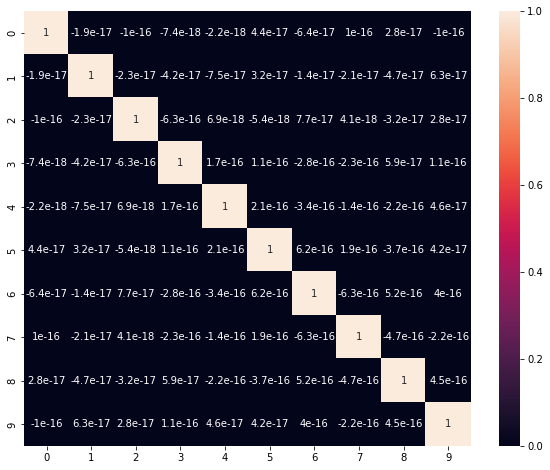

In [ ]:
fig = plt.figure(figsize=(10, 8))
sns.heatmap(X_pca.corr(),
            annot=True)

Train accuracy: 0.76
Test accuracy: 0.56

Test confusion_matrix


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:985: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



Text(33.0, 0.5, 'True')

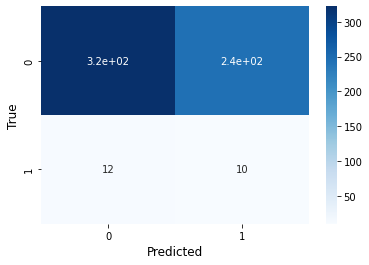

In [ ]:
# Make train and test sets
#from sklearn.model_selection import train_test_split
#X_train_pca, X_test_pca, y_train, y_test = train_test_split(X_pca, y, test_size=0.20,
                                                            #shuffle=True, random_state=2)

# Initialize the logistic regression model
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(max_iter=2500)

# Train the model
clf.fit(X_pca, y_train_SMOTE)

# Make predictions
y_pred = clf.predict(X_test_pca) # Predictions
y_true = y_test # True values

# Measure accuracy
from sklearn.metrics import accuracy_score
import numpy as np
print("Train accuracy:", np.round(accuracy_score(y_train_SMOTE,
                                                 clf.predict(X_pca)), 2))
print("Test accuracy:", np.round(accuracy_score(y_true, y_pred), 2))

# Make the confusion matrix
from sklearn.metrics import confusion_matrix
cf_matrix = confusion_matrix(y_true, y_pred)
print("\nTest confusion_matrix")
sns.heatmap(cf_matrix, annot=True, cmap='Blues')
plt.xlabel('Predicted', fontsize=12)
plt.ylabel('True', fontsize=12)

In [ ]:
#Print Test Set Accuracy
print("\n---Test Set Accuracy")
print(clf.score(X_test_pca, y_true))

#Confusion Matrix
print("\n---Confusion Matrix")
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_true, y_pred)
print(confusion_matrix)

#Classification Report
print("\n---Classification Report")
from sklearn.metrics import classification_report
print(classification_report(y_true, y_pred))

#An attempt at a regression model summary
print("\n---An attempt at a regression model summary")

import sklearn.metrics as metrics
def regression_results(y_true, y_pred):

    # Regression metrics
    explained_variance=metrics.explained_variance_score(y_true, y_pred)
    mean_absolute_error=metrics.mean_absolute_error(y_true, y_pred)
    mse=metrics.mean_squared_error(y_true, y_pred)
    mean_squared_log_error=metrics.mean_squared_log_error(y_true, y_pred)
    median_absolute_error=metrics.median_absolute_error(y_true, y_pred)
    r2=metrics.r2_score(y_true, y_pred)

    print('explained_variance: ', round(explained_variance,4))
    print('mean_squared_log_error: ', round(mean_squared_log_error,4))
    print('r2: ', round(r2,4))
    print('MAE: ', round(mean_absolute_error,4))
    print('MSE: ', round(mse,4))
    print('RMSE: ', round(np.sqrt(mse),4))


regression_results(y_true, y_pred)


---Test Set Accuracy
0.564625850340136

---Confusion Matrix
[[322 244]
 [ 12  10]]

---Classification Report
              precision    recall  f1-score   support

         0.0       0.96      0.57      0.72       566
         1.0       0.04      0.45      0.07        22

    accuracy                           0.56       588
   macro avg       0.50      0.51      0.39       588
weighted avg       0.93      0.56      0.69       588


---An attempt at a regression model summary
explained_variance:  -6.7661
mean_squared_log_error:  0.2092
r2:  -11.0887
MAE:  0.4354
MSE:  0.4354
RMSE:  0.6598


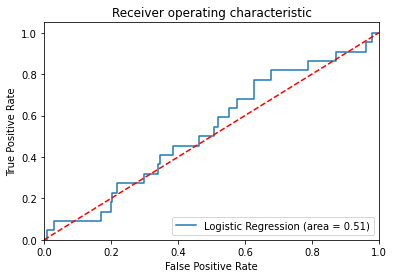

In [ ]:
#Make the Roc Curve for test data
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

logit_roc_auc = roc_auc_score(y_true, clf.predict(X_test_pca))
fpr, tpr, thresholds = roc_curve(y_true, clf.predict_proba(X_test_pca)[:,1])

plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC', transparent=True)
plt.show()

# Kernel PCA for Feature Selection

In [ ]:

# Do feature scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_scaled = sc.fit_transform(X_train_SMOTE)
X_test_scaled = sc.fit_transform(X_test)
# Apply PCA
from sklearn.decomposition import PCA
pca = PCA(n_components=10)
X_pca = pca.fit_transform(X_scaled)
X_test_pca = pca.fit_transform(X_test_scaled)

# Get the transformed dataset
X_pca = pd.DataFrame(X_pca)
print(X_pca.head())
print("\nSize: ")
print(X_pca.shape)

          0         1         2         3         4         5         6         7         8         9
0  2.836642 -1.519312 -1.811524 -0.638815  1.866087 -2.089153  0.265976 -0.736082  0.138866 -0.284857
1 -1.344378 -1.948152 -0.984193  1.376030 -0.092550 -0.889554  0.227599  1.074372 -0.969452 -0.947684
2 -1.629921 -1.384685 -2.103743 -1.890424 -0.687033  0.884397 -0.013463 -0.147552 -0.557175  0.312562
3  6.432174  1.927597 -2.017795  1.524728  0.313929  1.089156  0.076822  1.339667 -0.999221  0.009446
4  5.529232  0.748084  1.579432  0.912481 -1.440188  1.310973  0.306059 -0.579812 -0.908037 -0.002316

Size: 
(2636, 10)


Eigenvalues:
[9.57494019 5.01151361 2.32500213 1.82573343 1.72277629 1.26687786
 1.05690741 0.90251311 0.83224473 0.66050956]

Variances (Percentage):
[32.96088373 17.25169183  8.00361396  6.28492566  5.93050484  4.36111484
  3.63831016  3.10682147  2.86492877  2.27374566]



Text(0, 0.5, 'Explained variance (%)')

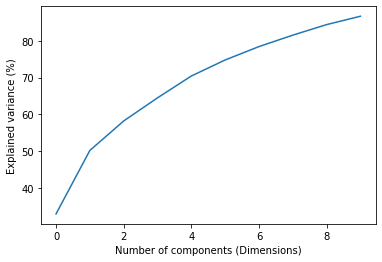

In [ ]:


# Apply Kernel PCA
from sklearn.decomposition import KernelPCA

kpca = KernelPCA(n_components=10, kernel='rbf',
                 random_state=42)
X_kpca = kpca.fit_transform(X_scaled)
X_test_kpca = kpca.fit_transform(X_test_scaled)

# Get the eigenvalues
print("Eigenvalues:")
print(pca.explained_variance_)
print()

# Get explained variances
print("Variances (Percentage):")
print(pca.explained_variance_ratio_ * 100)
print()

# Make the scree plot
plt.plot(np.cumsum(pca.explained_variance_ratio_ * 100))
plt.xlabel("Number of components (Dimensions)")
plt.ylabel("Explained variance (%)")

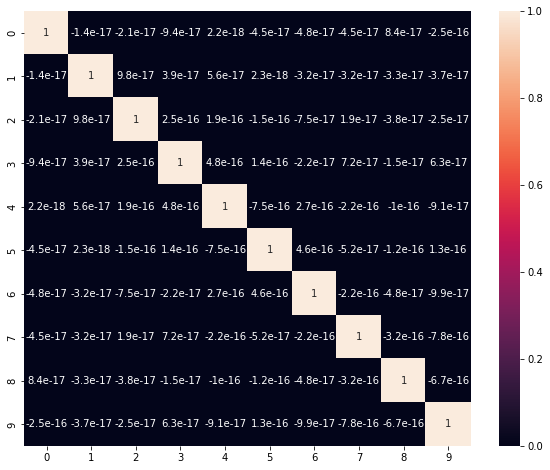

In [ ]:
fig = plt.figure(figsize=(10, 8))
sns.heatmap(X_pca.corr(),
            annot=True)

Train accuracy: 0.84
Test accuracy: 0.56

Test confusion_matrix


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:985: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



Text(33.0, 0.5, 'True')

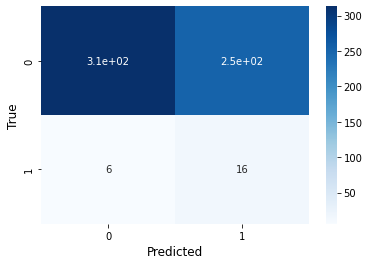

In [ ]:
# Initialize the logistic regression model
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(max_iter=2500)

# Train the model
clf.fit(X_kpca, y_train_SMOTE)

# Make predictions
y_pred = clf.predict(X_test_kpca) # Predictions
y_true = y_test # True values

# Measure accuracy
from sklearn.metrics import accuracy_score
import numpy as np
print("Train accuracy:", np.round(accuracy_score(y_train_SMOTE,
                                                 clf.predict(X_kpca)), 2))
print("Test accuracy:", np.round(accuracy_score(y_true, y_pred), 2))

# Make the confusion matrix
from sklearn.metrics import confusion_matrix
cf_matrix = confusion_matrix(y_true, y_pred)
print("\nTest confusion_matrix")
sns.heatmap(cf_matrix, annot=True, cmap='Blues')
plt.xlabel('Predicted', fontsize=12)
plt.ylabel('True', fontsize=12)

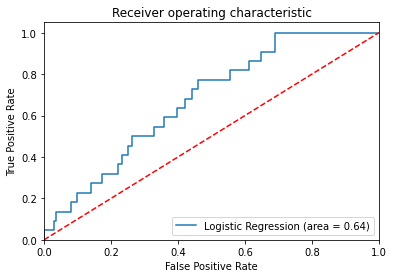

In [ ]:
#Make the Roc Curve for test data
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

logit_roc_auc = roc_auc_score(y_true, clf.predict(X_test_kpca))
fpr, tpr, thresholds = roc_curve(y_true, clf.predict_proba(X_test_kpca)[:,1])

plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC', transparent=True)
plt.show()

In [ ]:
#Print Test Set Accuracy
print("\n---Test Set Accuracy")
print(clf.score(X_test_kpca, y_true))

#Confusion Matrix
print("\n---Confusion Matrix")
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_true, y_pred)
print(confusion_matrix)

#Classification Report
print("\n---Classification Report")
from sklearn.metrics import classification_report
print(classification_report(y_true, y_pred))

#An attempt at a regression model summary
print("\n---An attempt at a regression model summary")

import sklearn.metrics as metrics
def regression_results(y_true, y_pred):

    # Regression metrics
    explained_variance=metrics.explained_variance_score(y_true, y_pred)
    mean_absolute_error=metrics.mean_absolute_error(y_true, y_pred)
    mse=metrics.mean_squared_error(y_true, y_pred)
    mean_squared_log_error=metrics.mean_squared_log_error(y_true, y_pred)
    median_absolute_error=metrics.median_absolute_error(y_true, y_pred)
    r2=metrics.r2_score(y_true, y_pred)

    print('explained_variance: ', round(explained_variance,4))
    print('mean_squared_log_error: ', round(mean_squared_log_error,4))
    print('r2: ', round(r2,4))
    print('MAE: ', round(mean_absolute_error,4))
    print('MSE: ', round(mse,4))
    print('RMSE: ', round(np.sqrt(mse),4))


regression_results(y_true, y_pred)


---Test Set Accuracy
0.5595238095238095

---Confusion Matrix
[[313 253]
 [  6  16]]

---Classification Report
              precision    recall  f1-score   support

         0.0       0.98      0.55      0.71       566
         1.0       0.06      0.73      0.11        22

    accuracy                           0.56       588
   macro avg       0.52      0.64      0.41       588
weighted avg       0.95      0.56      0.68       588


---An attempt at a regression model summary
explained_variance:  -6.3308
mean_squared_log_error:  0.2116
r2:  -11.2303
MAE:  0.4405
MSE:  0.4405
RMSE:  0.6637


# CART Approach

This code is modified from https://towardsdatascience.com/cart-classification-and-regression-trees-for-clean-but-powerful-models-cc89e60b7a85

In [ ]:
from sklearn.tree import DecisionTreeClassifier

def fitting(X, y, criterion, splitter, mdepth, clweight, minleaf):

    # Create training and testing samples
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify = y, random_state=42)

    #Apply SMOTE

    #smote = SMOTE(random_state=42)
    #X_train, y_train = smote.fit_resample(X_train, y_train)

    # Fit the model
    model = tree.DecisionTreeClassifier(criterion=criterion,
                                        splitter=splitter,
                                        max_depth=mdepth,
                                        class_weight=clweight,
                                        min_samples_leaf=minleaf,
                                        random_state=0,
                                  )
    clf = model.fit(X_train, y_train)



    # Predict class labels on training data
    pred_labels_tr = model.predict(X_train)
    #pred_labels_tr = (model.predict_proba(X_train)[:,1] >= 0.2).astype(bool)
    # Predict class labels on a test data
    pred_labels_te = model.predict(X_test)
    #pred_labels_te = (model.predict_proba(X_test)[:,1] >= 0.4).astype(bool)

    # Tree summary and model evaluation metrics
    print('*************** Tree Summary ***************')
    print('Classes: ', clf.classes_)
    print('Tree Depth: ', clf.tree_.max_depth)
    print('No. of leaves: ', clf.tree_.n_leaves)
    #print('No. of features: ', clf.n_features_)
    print('--------------------------------------------------------')
    print("")

    print('*************** Evaluation on Test Data ***************')
    score_te = model.score(X_test, y_test)
    print('Accuracy Score: ', score_te)
    # Look at classification report to evaluate the model
    print(classification_report(y_test, pred_labels_te))
    print('--------------------------------------------------------')
    print("")

    print('*************** Evaluation on Training Data ***************')
    score_tr = model.score(X_train, y_train)
    print('Accuracy Score: ', score_tr)
    # Look at classification report to evaluate the model
    print(classification_report(y_train, pred_labels_tr))
    print('--------------------------------------------------------')

    print('*************** Feature importance ***************')
    feature_importance = clf.feature_importances_
    print('Feature Importance: ', feature_importance)

    #Plot feature importance
    feature_imp = pd.Series(clf.feature_importances_, index = clf.feature_names_in_)
    plt.figure(figsize=(20,15))
    sns.barplot(x=feature_imp, y=feature_imp.index)
    plt.xlabel('Feature Importance Score')
    plt.ylabel('Features')
    plt.title("Visualizing Important Features", pad=15, size=14)

    #Make the Roc Curve for test data
    rfc_roc_auc = roc_auc_score(y_test, clf.predict(X_test))
    fpr, tpr, thresholds = roc_curve(y_test, clf.predict_proba(X_test)[:,1])

    plt.figure()
    plt.plot(fpr, tpr, label='CART (area = %0.2f)' % rfc_roc_auc)
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic')
    plt.legend(loc="lower right")
    plt.savefig('Log_ROC', transparent=True)
    plt.show()

    # Use graphviz to plot the tree
    dot_data = tree.export_graphviz(clf, out_file=None,
                                feature_names=X.columns,
                                class_names=[str(list(clf.classes_)[0]), str(list(clf.classes_)[1])],
                                filled=True,
                                rounded=True,
                                #rotate=True,
                               )
    graph = graphviz.Source(dot_data)

    # Return relevant data for chart plotting
    return X_train, X_test, y_train, y_test, clf, graph

*************** Tree Summary ***************
Classes:  [0. 1.]
Tree Depth:  10
No. of leaves:  57
--------------------------------------------------------

*************** Evaluation on Test Data ***************
Accuracy Score:  0.7393939393939394
              precision    recall  f1-score   support

         0.0       0.72      0.67      0.70       218
         1.0       0.76      0.79      0.77       277

    accuracy                           0.74       495
   macro avg       0.74      0.73      0.73       495
weighted avg       0.74      0.74      0.74       495

--------------------------------------------------------

*************** Evaluation on Training Data ***************
Accuracy Score:  0.9019947961838681
              precision    recall  f1-score   support

         0.0       0.88      0.90      0.89       509
         1.0       0.92      0.90      0.91       644

    accuracy                           0.90      1153
   macro avg       0.90      0.90      0.90      1153

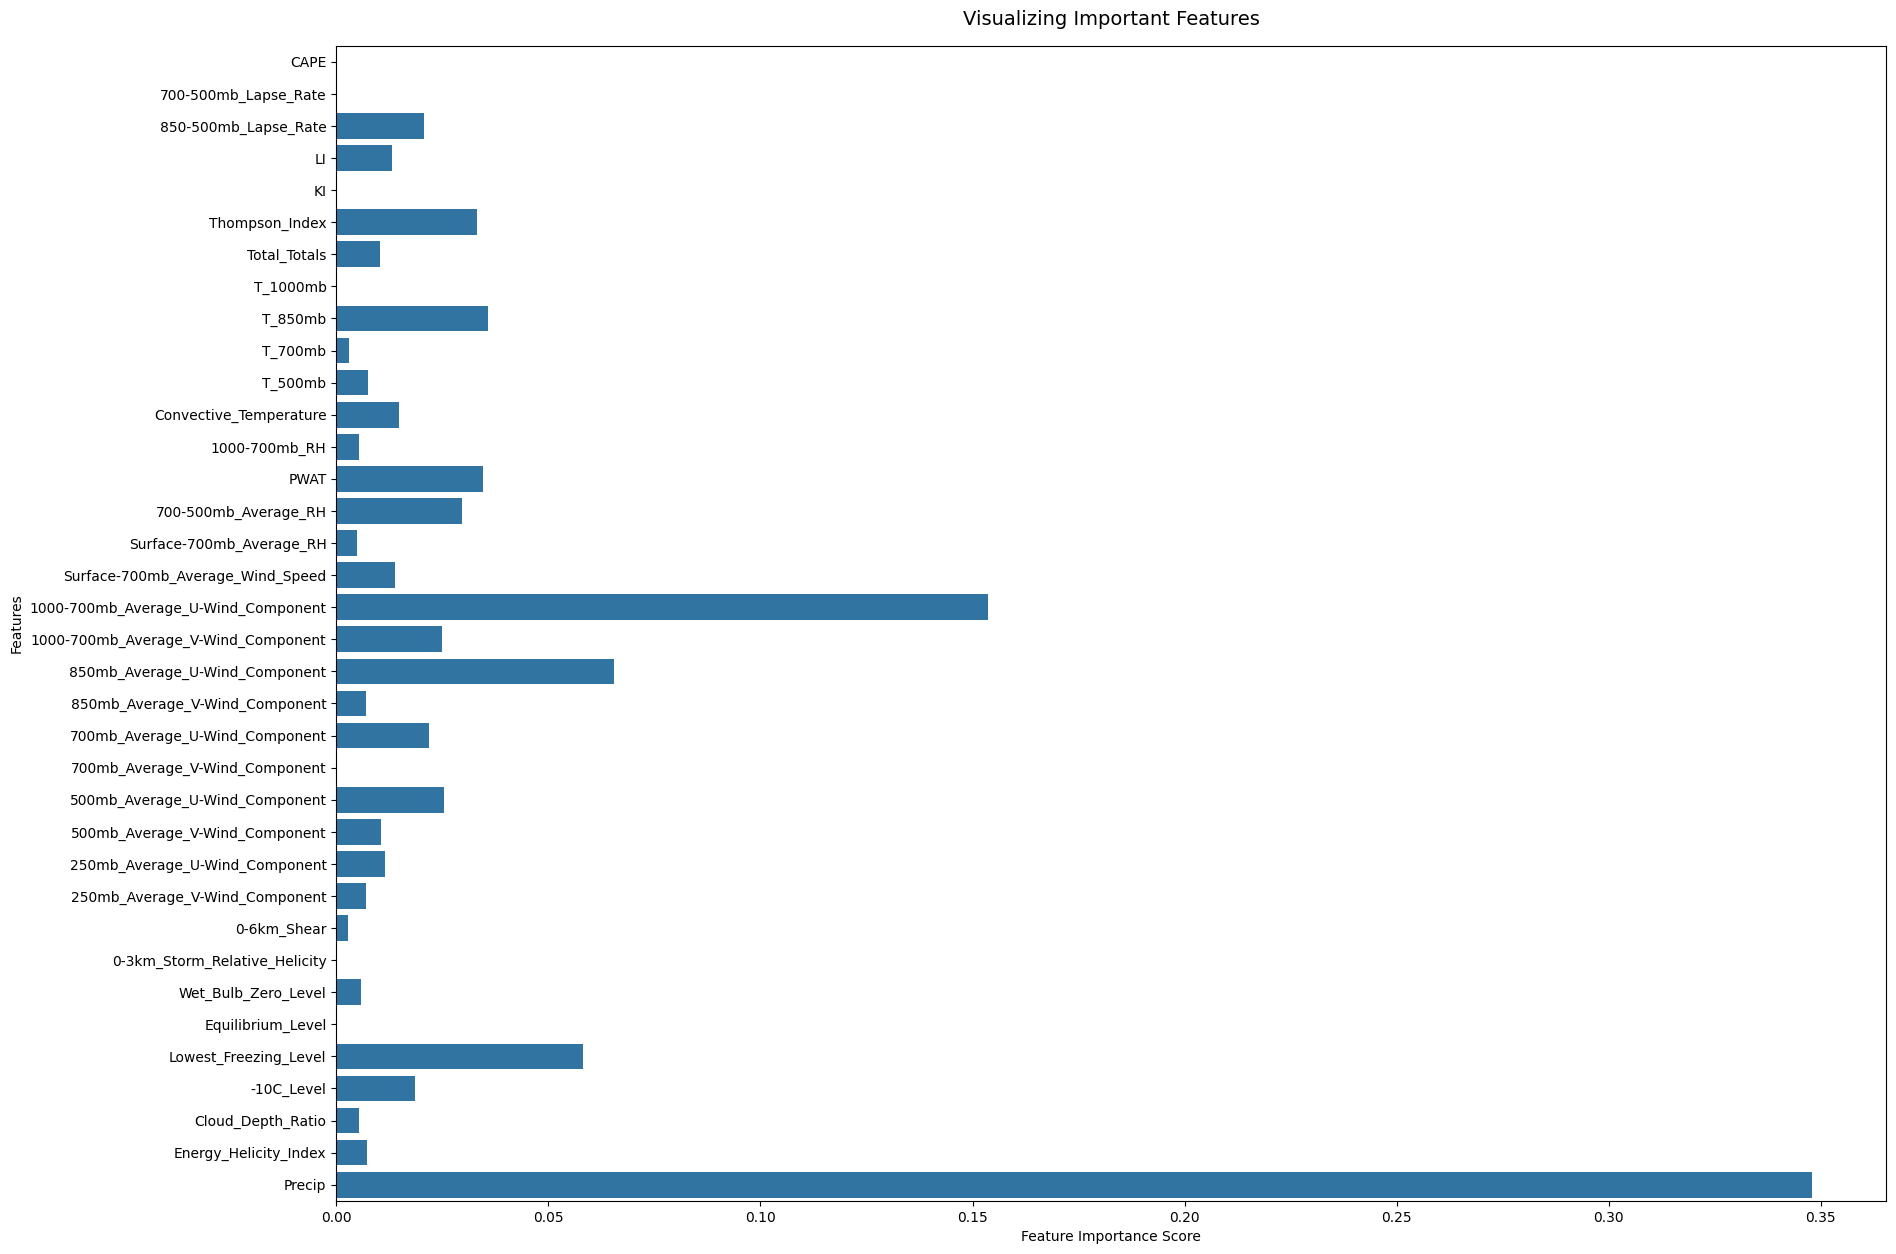

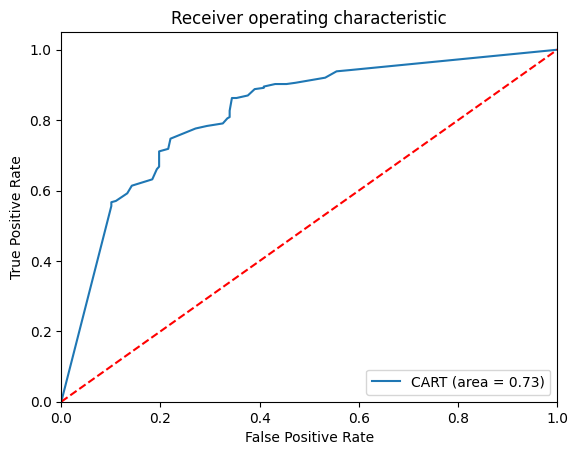

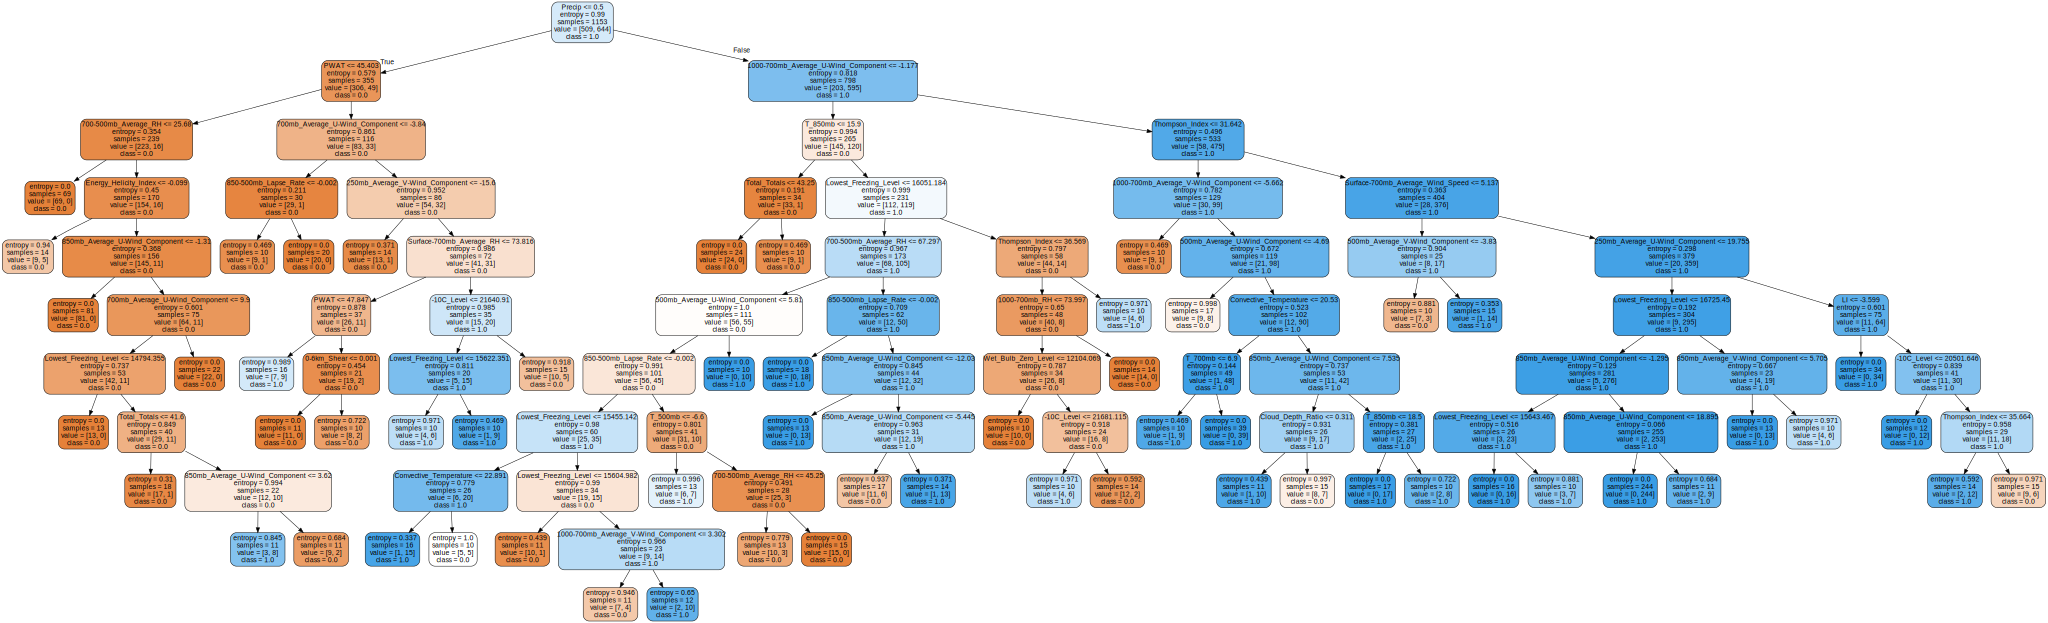

In [ ]:
# Fit the model and display results
X_train, X_test, y_train, y_test, clf, graph = fitting(X, y, 'entropy', 'best',
                                                       mdepth=15,
                                                       clweight=None,
                                                       minleaf=10)

# Plot the tree graph
graph


# Save tree graph to a PDF
#graph.render('Decision_Tree_all_vars_gini')

In [ ]:
X_cart = X[['CAPE', 'LR_850_500', 'u_comp_1000_700', 'u_comp_850','v_comp_250', 'M10C_Level']].copy()

X_train, X_test, y_train, y_test, clf, graph = fitting(X_cart, y, 'entropy', 'best',
                                                       mdepth=15,
                                                       clweight=None,
                                                       minleaf=100)

# Plot the tree graph
graph

KeyError: "['LR_850_500', 'u_comp_1000_700', 'u_comp_850', 'v_comp_250', 'M10C_Level'] not in index"

# Random Forest Classifier

In [51]:
def hss(a, b, c, d):
  return (2*(a*d)-(b*c))/(((a+c)*(c+d)) + ((a + b)*(b+d)))

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(



---Test Set Accuracy
0.7830802603036876

---Confusion Matrix
[[143  59]
 [ 41 218]]

---Classification Report
              precision    recall  f1-score   support

         0.0       0.78      0.71      0.74       202
         1.0       0.79      0.84      0.81       259

    accuracy                           0.78       461
   macro avg       0.78      0.77      0.78       461
weighted avg       0.78      0.78      0.78       461


Test confusion_matrix


Text(50.722222222222214, 0.5, 'True')

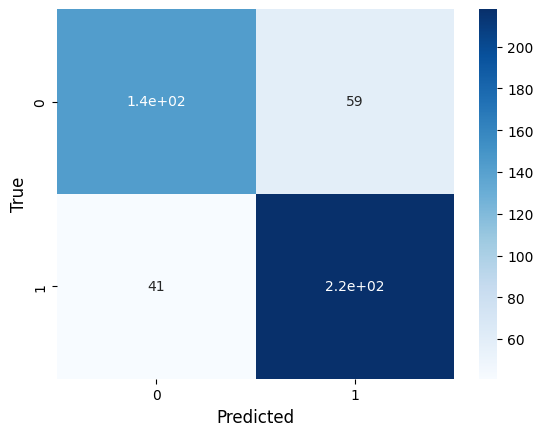

In [19]:
from sklearn.ensemble import RandomForestClassifier

RFC_model = RandomForestClassifier(n_estimators=100,  criterion='gini', max_depth=6, max_features='auto',
                                 bootstrap=True, n_jobs=1,
                                 random_state=42)

RFC_model.fit(X_train, y_train.values.ravel())
y_pred = RFC_model.predict(X_test)

#Print Test Set Accuracy
print("\n---Test Set Accuracy")
print(RFC_model.score(X_test, y_test))

#Confusion Matrix
print("\n---Confusion Matrix")
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)

#Classification Report
print("\n---Classification Report")
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

# Make the confusion matrix

#cf_matrix = confusion_matrix(y_true, y_pred)
print("\nTest confusion_matrix")
sns.heatmap(confusion_matrix, annot=True, cmap='Blues')
plt.xlabel('Predicted', fontsize=12)
plt.ylabel('True', fontsize=12)


In [ ]:
hss1 = hss(15, 93, 7, 473)
print(hss1)

hss2 = hss(6, 25, 9, 352)
print(hss2)

0.18886006026113156
0.23383230031575256


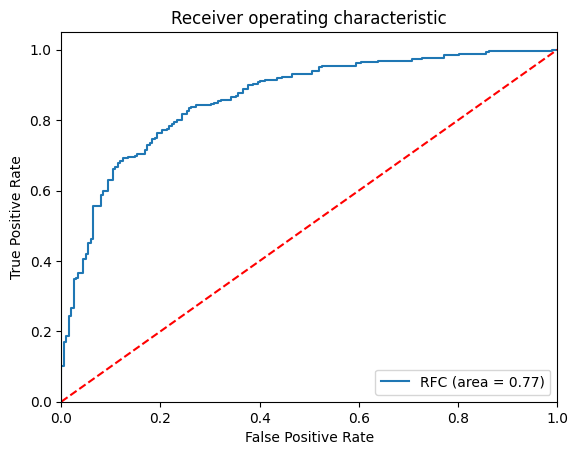

In [53]:
#Make the Roc Curve for test data
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

rfc_roc_auc = roc_auc_score(y_test, RFC_model.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, RFC_model.predict_proba(X_test)[:,1])

plt.figure()
plt.plot(fpr, tpr, label='RFC (area = %0.2f)' % rfc_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC', transparent=True)
plt.show()

Text(0.5, 1.0, 'Visualizing Important Features')

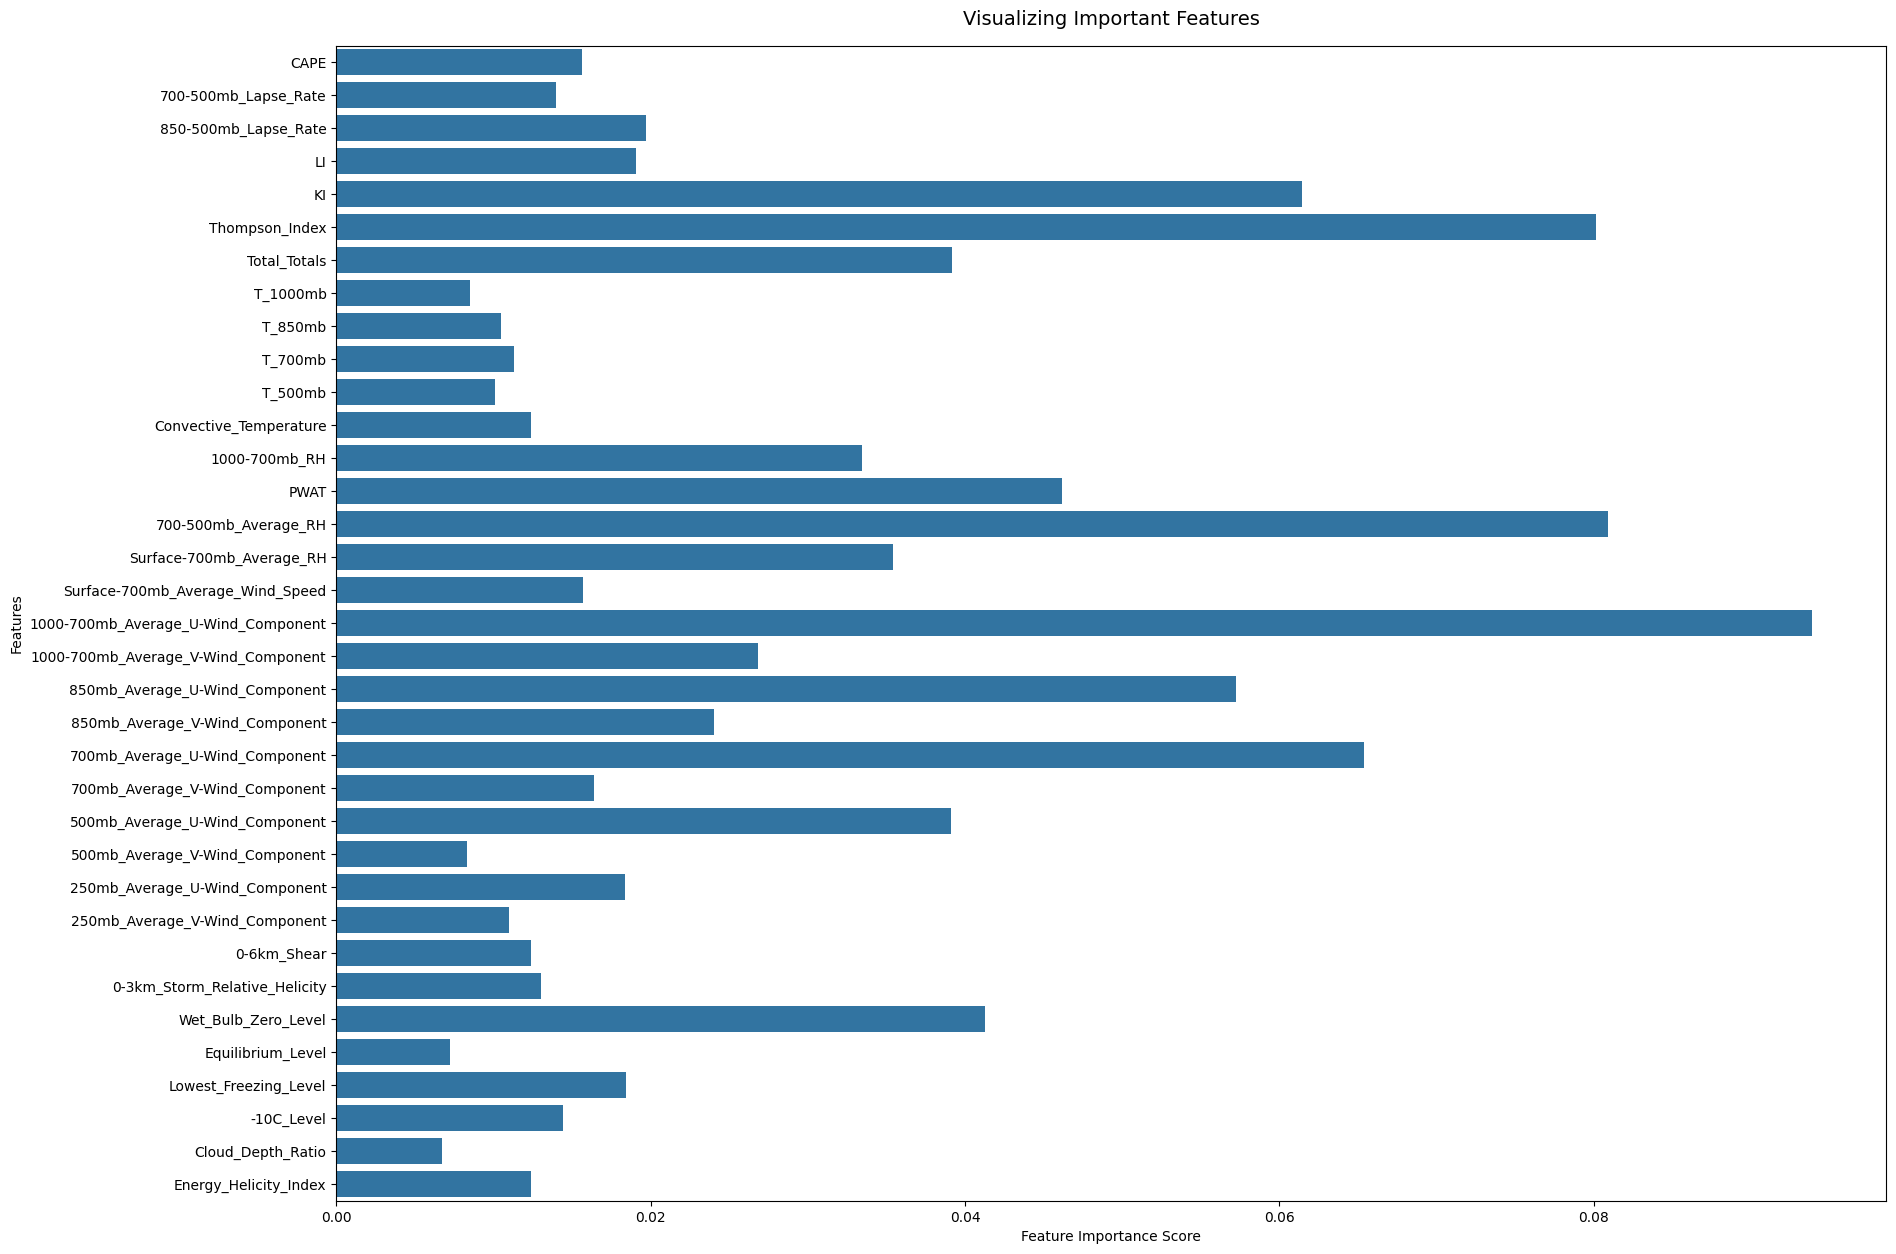

In [54]:
#feature_imp = pd.Series(model.feature_importances_,
                        #index=['sepal length (cm)', 'sepal width (cm)',
#'petal length (cm)', 'petal width (cm)']).sort_values(ascending=False)

feature_imp = pd.Series(RFC_model.feature_importances_, index = RFC_model.feature_names_in_)


plt.figure(figsize=(20,15))
sns.barplot(x=feature_imp, y=feature_imp.index)
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features", pad=15, size=14)



In [ ]:
print(RFC_model.feature_names_in_)

['CAPE' '700-500mb_Lapse_Rate' '850-500mb_Lapse_Rate' 'LI' 'KI'
 'Thompson_Index' 'Total_Totals' 'T_1000mb' 'T_850mb' 'T_700mb' 'T_500mb'
 'Convective_Temperature' '1000-700mb_RH' 'PWAT' '700-500mb_Average_RH'
 'Surface-700mb_Average_RH' 'Surface-700mb_Average_Wind_Speed'
 '1000-700mb_Average_U-Wind_Component'
 '1000-700mb_Average_V-Wind_Component' '850mb_Average_U-Wind_Component'
 '850mb_Average_V-Wind_Component' '700mb_Average_U-Wind_Component'
 '700mb_Average_V-Wind_Component' '500mb_Average_U-Wind_Component'
 '500mb_Average_V-Wind_Component' '250mb_Average_U-Wind_Component'
 '250mb_Average_V-Wind_Component' '0-6km_Shear'
 '0-3km_Storm_Relative_Helicity' 'Wet_Bulb_Zero_Level' 'Equilibrium_Level'
 'Lowest_Freezing_Level' '-10C_Level' 'Cloud_Depth_Ratio'
 'Energy_Helicity_Index' 'Precip']


Trying a RFC with only the most important features (0.06 as cutoff)

In [20]:
"""
X_train_SMOTE_RFC = X_train_SMOTE[['CAPE', 'LR_700_500', 'LR_850_500', 'Thompson', 'Total_Totals' ,'T_1000mb',
 'T_850mb' ,'T_700mb' ,'T_500mb' ,'Convective_temp', 'RH_1000_700', 'PWAT',
 'RH_700_500' ,'Surface_700_windspeed', 'u_comp_1000_700' ,
 'u_comp_850', 'u_comp_700' ,'v_comp_700' ,'u_comp_500',
 'v_comp_500', 'u_comp_250' ,'v_comp_250', 'shear_0_6km' ,
 'WBZ_Level', 'Lowest_FZ_Level', 'M10C_Level']].copy()

#X_test_RFC = X_test[['CAPE', 'LR_700_500', 'LR_850_500', 'Thompson', 'Total_Totals' ,'T_1000mb',
 'T_850mb' ,'T_700mb' ,'T_500mb' ,'Convective_temp', 'RH_1000_700', 'PWAT',
 'RH_700_500' ,'Surface_700_windspeed', 'u_comp_1000_700' ,
 'u_comp_850', 'u_comp_700' ,'v_comp_700' ,'u_comp_500',
 'v_comp_500', 'u_comp_250' ,'v_comp_250', 'shear_0_6km' ,
 'WBZ_Level', 'Lowest_FZ_Level', 'M10C_Level']].copy()
 """

X_train_RFC = X_train[['Thompson_Index', '1000-700mb_Average_U-Wind_Component','700-500mb_Average_RH' ]].copy()
X_test_RFC = X_test[['Thompson_Index', '1000-700mb_Average_U-Wind_Component', '700-500mb_Average_RH']].copy()

<ipython-input-24-20cb10f1bc4d>:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  RFC_model.fit(X_train_RFC, y_train)



---Test Set Accuracy
0.7700650759219089

---Confusion Matrix
[[147  55]
 [ 51 208]]

---Classification Report
              precision    recall  f1-score   support

         0.0       0.74      0.73      0.73       202
         1.0       0.79      0.80      0.80       259

    accuracy                           0.77       461
   macro avg       0.77      0.77      0.77       461
weighted avg       0.77      0.77      0.77       461


Test confusion_matrix


Text(50.722222222222214, 0.5, 'True')

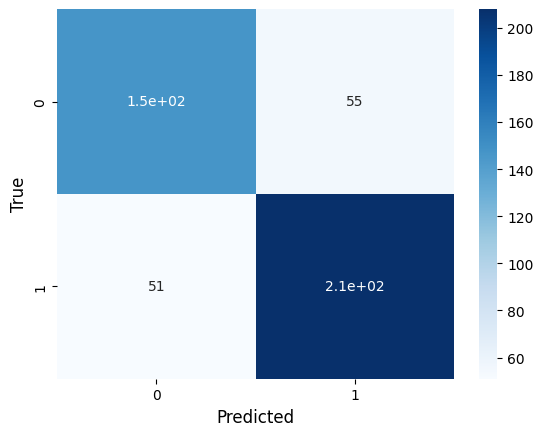

In [24]:


RFC_model = RandomForestClassifier(n_estimators=100,criterion='entropy',
                                 bootstrap=True, n_jobs=1,
                                 random_state=42, oob_score=True)

RFC_model.fit(X_train_RFC, y_train)
y_pred = RFC_model.predict(X_test_RFC)


#Print Test Set Accuracy
print("\n---Test Set Accuracy")
print(RFC_model.score(X_test_RFC, y_test))
#print(RFC_model.score(X_train_RFC, y_train))

#Confusion Matrix
print("\n---Confusion Matrix")
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
#confusion_matrix = confusion_matrix(y_train, y_pred)
print(confusion_matrix)

#Classification Report
print("\n---Classification Report")
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))
#print(classification_report(y_train, y_pred))
#RFC_model.predict_proba(X_test_RFC)

#cf_matrix = confusion_matrix(y_true, y_pred)
print("\nTest confusion_matrix")
sns.heatmap(confusion_matrix, annot=True, cmap='Blues')
plt.xlabel('Predicted', fontsize=12)
plt.ylabel('True', fontsize=12)

In [295]:
y_test

Lightning
903         0.0
533         1.0
4762        0.0
4031        1.0
2963        0.0
...         ...
5084        1.0
1586        1.0
3282        0.0
2625        1.0
1618        1.0

[461 rows x 1 columns]

In [296]:
RFC_test_probs = RFC_model.predict_proba(X_test_RFC)
df_RFC_probs = pd.DataFrame(RFC_test_probs)
df_RFC_probs

0     1
0    1.00  0.00
1    0.32  0.68
2    0.50  0.50
3    0.61  0.39
4    0.80  0.20
..    ...   ...
456  0.71  0.29
457  0.07  0.93
458  0.06  0.94
459  0.20  0.80
460  0.05  0.95

[461 rows x 2 columns]

In [297]:
y_test = pd.DataFrame(y_test)

In [298]:
y_pred = pd.DataFrame(y_pred)

In [299]:
y_test.to_csv('RFC_y_test.csv')
y_pred.to_csv('RFC_y_pred.csv')

In [300]:

#y1_test_reset = y1_test.reset_index()
df_RFC_probs = pd.concat([df_RFC_probs, y1_test['Lightning']], axis=1)
df_RFC_probs
df_RFC_probs.to_csv('RFC_probs.csv')

#y1_test['Lightning']

Text(0.5, 1.0, 'Visualizing Important Features')

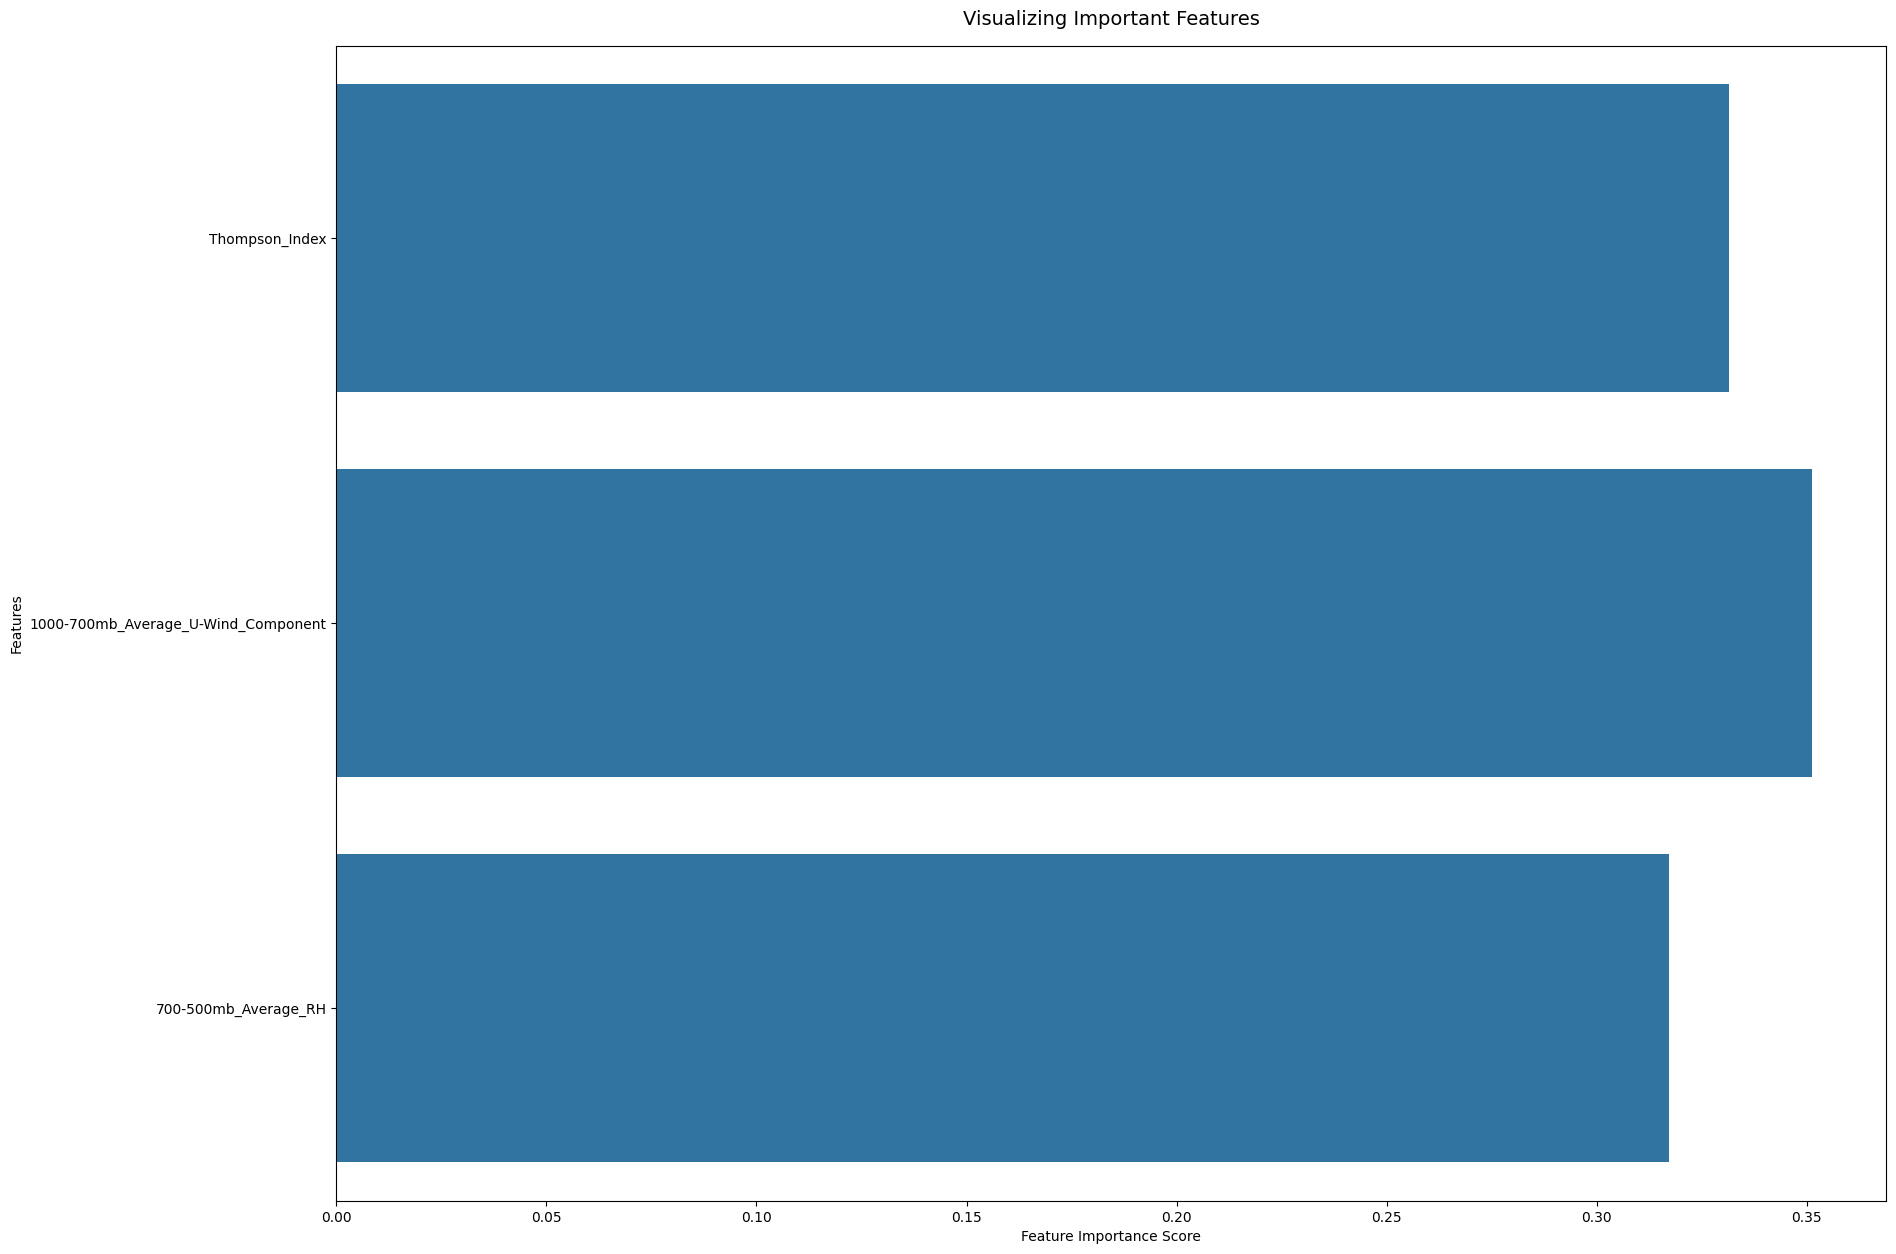

In [60]:
feature_imp = pd.Series(RFC_model.feature_importances_, index = RFC_model.feature_names_in_)


plt.figure(figsize=(20,15))
sns.barplot(x=feature_imp, y=feature_imp.index)
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features", pad=15, size=14)

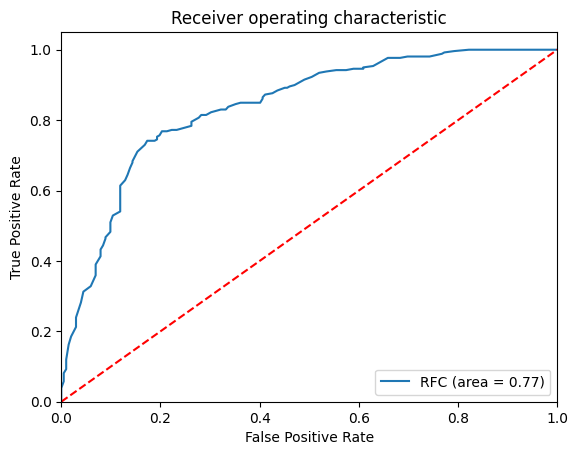

In [61]:
#Make the Roc Curve for test data
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

rfc_roc_auc = roc_auc_score(y_test, RFC_model.predict(X_test_RFC))
fpr, tpr, thresholds = roc_curve(y_test, RFC_model.predict_proba(X_test_RFC)[:,1])

plt.figure()
plt.plot(fpr, tpr, label='RFC (area = %0.2f)' % rfc_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC', transparent=True)
plt.show()

# XG Classifier

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

In [ ]:
gradient_booster = GradientBoostingClassifier(learning_rate=0.1, random_state=5)
gradient_booster.get_params()

{'ccp_alpha': 0.0,
 'criterion': 'friedman_mse',
 'init': None,
 'learning_rate': 0.1,
 'loss': 'log_loss',
 'max_depth': 3,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_iter_no_change': None,
 'random_state': 5,
 'subsample': 1.0,
 'tol': 0.0001,
 'validation_fraction': 0.1,
 'verbose': 0,
 'warm_start': False}

In [ ]:
gradient_booster.fit(X_train,y_train)
print(classification_report(y_test,gradient_booster.predict(X_test)))

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


              precision    recall  f1-score   support

         0.0       0.73      0.70      0.72       202
         1.0       0.77      0.80      0.78       259

    accuracy                           0.75       461
   macro avg       0.75      0.75      0.75       461
weighted avg       0.75      0.75      0.75       461



/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)



---Test Set Accuracy
0.7744034707158352

---Confusion Matrix
[[146  56]
 [ 47 212]]

---Classification Report
              precision    recall  f1-score   support

         0.0       0.76      0.72      0.74       202
         1.0       0.79      0.82      0.80       259

    accuracy                           0.78       461
   macro avg       0.77      0.77      0.77       461
weighted avg       0.78      0.78      0.78       461


Test confusion_matrix


Text(50.722222222222214, 0.5, 'True')

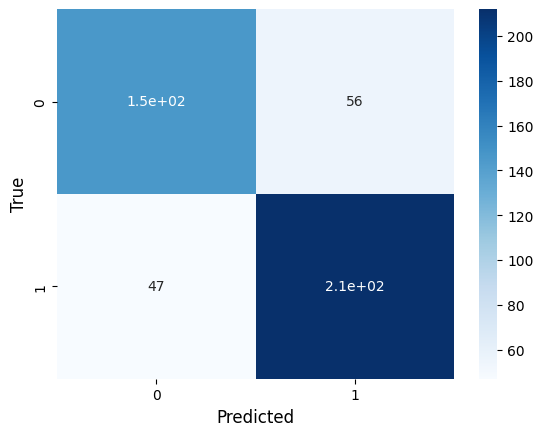

In [ ]:

gradient_booster.fit(X_train_RFC,y_train)
y_pred = gradient_booster.predict(X_test_RFC)

#Print Test Set Accuracy
print("\n---Test Set Accuracy")
print(RFC_model.score(X_test_RFC, y_test))

#Confusion Matrix
print("\n---Confusion Matrix")
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)

#Classification Report
print("\n---Classification Report")
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))
#RFC_model.predict_proba(X_test_RFC)

#cf_matrix = confusion_matrix(y_true, y_pred)
print("\nTest confusion_matrix")
sns.heatmap(confusion_matrix, annot=True, cmap='Blues')
plt.xlabel('Predicted', fontsize=12)
plt.ylabel('True', fontsize=12)

# Deploy Random Forest Model



In [25]:
import joblib

In [26]:
joblib.dump(RFC_model, "RFC_model.sav")

['RFC_model.sav']

In [ ]:
pip install prediction

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.1/7.1 MB 5.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.5/45.5 kB 4.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 24.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 511.7/511.7 kB 20.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 795.1/795.1 kB 23.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for django-rest-framework: filename=django_rest_framework-0.1.0-py3-none-any.whl size=1360 sha256=fdfa3240e195e29f0a42456fbf720cefa7c6083fd400f952cbb59e96e3e84938
  Stored in directory: /root/.cache/pip/wheels/e9/7a/2e/1a2a7553da2615e08fa4ec61c87c302e6174189cfcd98125cb
  error: subprocess-exited-with-error
  
  × python setup.py bdist_wheel did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with 

In [27]:
pip install streamlit

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.4/8.4 MB 23.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 195.4/195.4 kB 19.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.8/4.8 MB 39.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 83.0/83.0 kB 9.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 6.3 MB/s eta 0:00:00


In [28]:
import joblib
def predict(data):
    clf = joblib.load("RFC_model.sav")
    return clf.predict(data)

In [29]:
import streamlit as st
import pandas as pd
import numpy as np


In [30]:
%%writefile prediction.py
import joblib
import pandas as pd
def predict(data):
    clf = joblib.load("RFC_model.sav")
    prediction = clf.predict_proba(data)
    df_prob = pd.DataFrame(prediction)
    return df_prob[1]*100

Writing prediction.py


In [31]:
%%writefile app.py
import streamlit as st
import numpy as np
import pandas as pd
from prediction import predict

st.title('Cape Canaveral Lightning Probability Tool')
st.markdown('Input parameters from 10Z KXMR sounding')

st.header('Sounding Parameters')
col1, col2 = st.columns(2)
with col1:
  Thompson_Index = st.slider('Thompson Index', 0.0, 60.0, 1.0)
  RH = st.slider('700-500mb Average RH', 0.0, 100.0, 1.0)
with col2:
  #wind_average = st.slider('1000-700mb Average U-Wind Component', -40.0, 40.0, 0.5)
  wind_speed = st.slider('1000-700mb Average Wind Speed', 0.0, 50.0, 0.5)
  wind_direction = st.slider('1000-700mb Average Wind Direction', 0.0, 360.0, 1.0)

if st.button('Probability of Lightning'):
  #result = predict(np.array([[Thompson_Index, wind_average]]))

  wind_average = wind_speed * np.cos(np.deg2rad(270-wind_direction))

  result = predict(np.array([[Thompson_Index, wind_average, RH]]))
  #result_str = str(int(result[0])) + '%'
  st.header(str(int(result[0])) + '%')






Writing app.py


In [32]:
!npm install localtunnel

npm WARN saveError ENOENT: no such file or directory, open '/content/package.json'
npm notice created a lockfile as package-lock.json. You should commit this file.
npm WARN enoent ENOENT: no such file or directory, open '/content/package.json'
npm WARN content No description
npm WARN content No repository field.
npm WARN content No README data
npm WARN content No license field.

+ localtunnel@2.0.2
added 22 packages from 22 contributors and audited 22 packages in 3.35s

3 packages are looking for funding
  run `npm fund` for details

found 1 moderate severity vulnerability
  run `npm audit fix` to fix them, or `npm audit` for details


In [33]:
!npm audit fix

npm ERR! code EAUDITNOPJSON
npm ERR! audit No package.json found: Cannot audit a project without a package.json

npm ERR! A complete log of this run can be found in:
npm ERR!     /root/.npm/_logs/2024-02-26T23_00_32_491Z-debug.log


In [34]:
!streamlit run /content/app.py &>/content/logs.txt &

In [35]:
import urllib
print("Password/Enpoint IP for localtunnel is:",urllib.request.urlopen('https://ipv4.icanhazip.com').read().decode('utf8').strip("\n"))

Password/Enpoint IP for localtunnel is: 34.136.141.59


In [36]:
!npx localtunnel --port 8501

npx: installed 22 in 2.705s
your url is: https://seven-cameras-nail.loca.lt
^C


In [98]:
np.cos(np.deg2rad(180))
#np.deg2rad(90)

-1.0